<a href="https://colab.research.google.com/github/nidhishtk/Assignment_16_Neural-Networks/blob/main/Q1_forestfires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classify The Size_Categorie Using NEURAL NETWORKS

## Data Description:

- month :	month of the year: 'jan' to 'dec'
- day :	day of the week: 'mon' to 'sun'
- FFMC :	FFMC index from the FWI system: 18.7 to 96.20
- DMC :	DMC index from the FWI system: 1.1 to 291.3
- DC :	DC index from the FWI system: 7.9 to 860.6
- ISI :	ISI index from the FWI system: 0.0 to 56.10
- temp :	temperature in Celsius degrees: 2.2 to 33.30
- RH :	relative humidity in %: 15.0 to 100
- wind :	wind speed in km/h: 0.40 to 9.40
- rain :	outside rain in mm/m2 : 0.0 to 6.4
- Size_Categorie : 	the burned area of the forest ( Small , Large)

## Attaching Resources

### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

<Figure size 3750x2000 with 0 Axes>

### Adding Dataset

In [2]:
from google.colab import files
ff = files.upload()

ff = pd.read_csv('forestfires.csv')

ff

Saving forestfires.csv to forestfires.csv


month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0           0         0         0         1         0         0         0   
1           0         0         0         0         0         0         1   
2           0         0         0         0         0         0         1   
3           0         0         0         1         0         0         0   
4           0         0         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         1         0   

     monthsep  size_category  
0           0          small  
1           0          small  
2           0          small  
3           0          small  
4           0          small  
..        ...            ...  
512         0          large  
513         0          large  
514         0          large  
515         0          small  
516         0          small  

[517 rows x 31 columns]

In [4]:
ff_nrow = ff.shape[0]

In [5]:
def lost_record():

    ff_nrow_now = ff.shape[0]
    lost = ff_nrow - ff_nrow_now
    lost = (lost/ff_nrow)*100
    lost = round(lost, 2)

    return print('We lost ' + str(lost) + ' % data')


## Performing EDA In Dataset

### Applying Descriptive Statistics

In [6]:
ff.describe()


FFMC         DMC          DC         ISI        temp          RH  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean    90.644681  110.872340  547.940039    9.021663   18.889168   44.288201   
std      5.520111   64.046482  248.066192    4.559477    5.806625   16.317469   
min     18.700000    1.100000    7.900000    0.000000    2.200000   15.000000   
25%     90.200000   68.600000  437.700000    6.500000   15.500000   33.000000   
50%     91.600000  108.300000  664.200000    8.400000   19.300000   42.000000   
75%     92.900000  142.400000  713.900000   10.800000   22.800000   53.000000   
max     96.200000  291.300000  860.600000   56.100000   33.300000  100.000000   

             wind        rain         area      dayfri  ...    monthdec  \
count  517.000000  517.000000   517.000000  517.000000  ...  517.000000   
mean     4.017602    0.021663    12.847292    0.164410  ...    0.017408   
std      1.791653    0.295959    63.655818    0.371006  ...    0.130913   
min      0.400000    0.000000     0.000000    0.000000  ...    0.000000   
25%      2.700000    0.000000     0.000000    0.000000  ...    0.000000   
50%      4.000000    0.000000     0.520000    0.000000  ...    0.000000   
75%      4.900000    0.000000     6.570000    0.000000  ...    0.000000   
max      9.400000    6.400000  1090.840000    1.000000  ...    1.000000   

         monthfeb    monthjan    monthjul    monthjun    monthmar    monthmay  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     0.038685    0.003868    0.061896    0.032882    0.104449    0.003868   
std      0.193029    0.062137    0.241199    0.178500    0.306138    0.062137   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         monthnov    monthoct    monthsep  
count  517.000000  517.000000  517.000000  
mean     0.001934    0.029014    0.332689  
std      0.043980    0.168007    0.471632  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    1.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 28 columns]

In [7]:
ff.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [8]:
ff.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [9]:
def uni(df):

    for i in range(len(df.columns)):
        print('\n All Unique Value in ' + str(df.columns[i]))
        print(np.sort(df[df.columns[i]].unique()))
        print('Total no of unique values ' +
              str(len(df[df.columns[i]].unique())))


In [10]:
uni(ff)


 All Unique Value in month
['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
Total no of unique values 12

 All Unique Value in day
['fri' 'mon' 'sat' 'sun' 'thu' 'tue' 'wed']
Total no of unique values 7

 All Unique Value in FFMC
[18.7 50.4 53.4 63.5 68.2 69.  75.1 79.5 81.5 81.6 81.9 82.1 83.  83.9
 84.  84.1 84.2 84.4 84.6 84.7 84.9 85.  85.1 85.2 85.4 85.6 85.8 85.9
 86.2 86.3 86.6 86.8 86.9 87.1 87.2 87.5 87.6 87.9 88.  88.1 88.2 88.3
 88.6 88.8 88.9 89.2 89.3 89.4 89.6 89.7 90.  90.1 90.2 90.3 90.4 90.5
 90.6 90.7 90.8 90.9 91.  91.1 91.2 91.3 91.4 91.5 91.6 91.7 91.8 91.9
 92.  92.1 92.2 92.3 92.4 92.5 92.6 92.7 92.8 92.9 93.  93.1 93.2 93.3
 93.4 93.5 93.6 93.7 93.9 94.  94.2 94.3 94.4 94.5 94.6 94.8 94.9 95.
 95.1 95.2 95.5 95.8 95.9 96.  96.1 96.2]
Total no of unique values 106

 All Unique Value in DMC
[  1.1   2.4   3.    3.2   3.6   3.7   4.4   4.6   4.9   6.6   6.8   7.3
   8.    8.2   8.7   9.    9.1   9.3   9.5  13.2  14.6  15.   15.1  15.6
  17

### Checking for Duplicated Values

In [11]:
ff[ff.duplicated()]

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
53    aug  wed  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0  ...         0   
100   aug  sun  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0  ...         0   
215   mar  sat  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0  ...         0   
303   jun  fri  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0  ...         0   
426   aug  thu  91.6  248.4  753.8   6.3  20.4  56   2.2   0.0  ...         0   
461   aug  sat  93.7  231.1  715.1   8.4  18.9  64   4.9   0.0  ...         0   
501   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8  ...         0   
508   aug  fri  91.0  166.9  752.6   7.1  25.9  41   3.6   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
53          0         0         0         0         0         0         0   
100         0         0         0         0         0         0         0   
215         0         0         0         1         0         0         0   
303         0         0         1         0         0         0         0   
426         0         0         0         0         0         0         0   
461         0         0         0         0         0         0         0   
501         0         0         0         0         0         0         0   
508         0         0         0         0         0         0         0   

     monthsep  size_category  
53          0          small  
100         0          small  
215         0          large  
303         0          small  
426         0          small  
461         0          small  
501         0          small  
508         0          small  

[8 rows x 31 columns]

In [12]:
ff.drop_duplicates(inplace = True)

In [13]:
ff[ff.duplicated()]

Empty DataFrame
Columns: [month, day, FFMC, DMC, DC, ISI, temp, RH, wind, rain, area, dayfri, daymon, daysat, daysun, daythu, daytue, daywed, monthapr, monthaug, monthdec, monthfeb, monthjan, monthjul, monthjun, monthmar, monthmay, monthnov, monthoct, monthsep, size_category]
Index: []

[0 rows x 31 columns]

- There is no duplicate vale in are dataset

#### Reseting Index

In [14]:
ff.reset_index(inplace=True)
ff.drop(columns='index',inplace=True)

ff

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
504   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
505   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
506   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
507   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
508   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0           0         0         0         1         0         0         0   
1           0         0         0         0         0         0         1   
2           0         0         0         0         0         0         1   
3           0         0         0         1         0         0         0   
4           0         0         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
504         0         0         0         0         0         0         0   
505         0         0         0         0         0         0         0   
506         0         0         0         0         0         0         0   
507         0         0         0         0         0         0         0   
508         0         0         0         0         0         1         0   

     monthsep  size_category  
0           0          small  
1           0          small  
2           0          small  
3           0          small  
4           0          small  
..        ...            ...  
504         0          large  
505         0          large  
506         0          large  
507         0          small  
508         0          small  

[509 rows x 31 columns]

### Visualizing The Data

#### Ploting Boxplot

<Axes: >

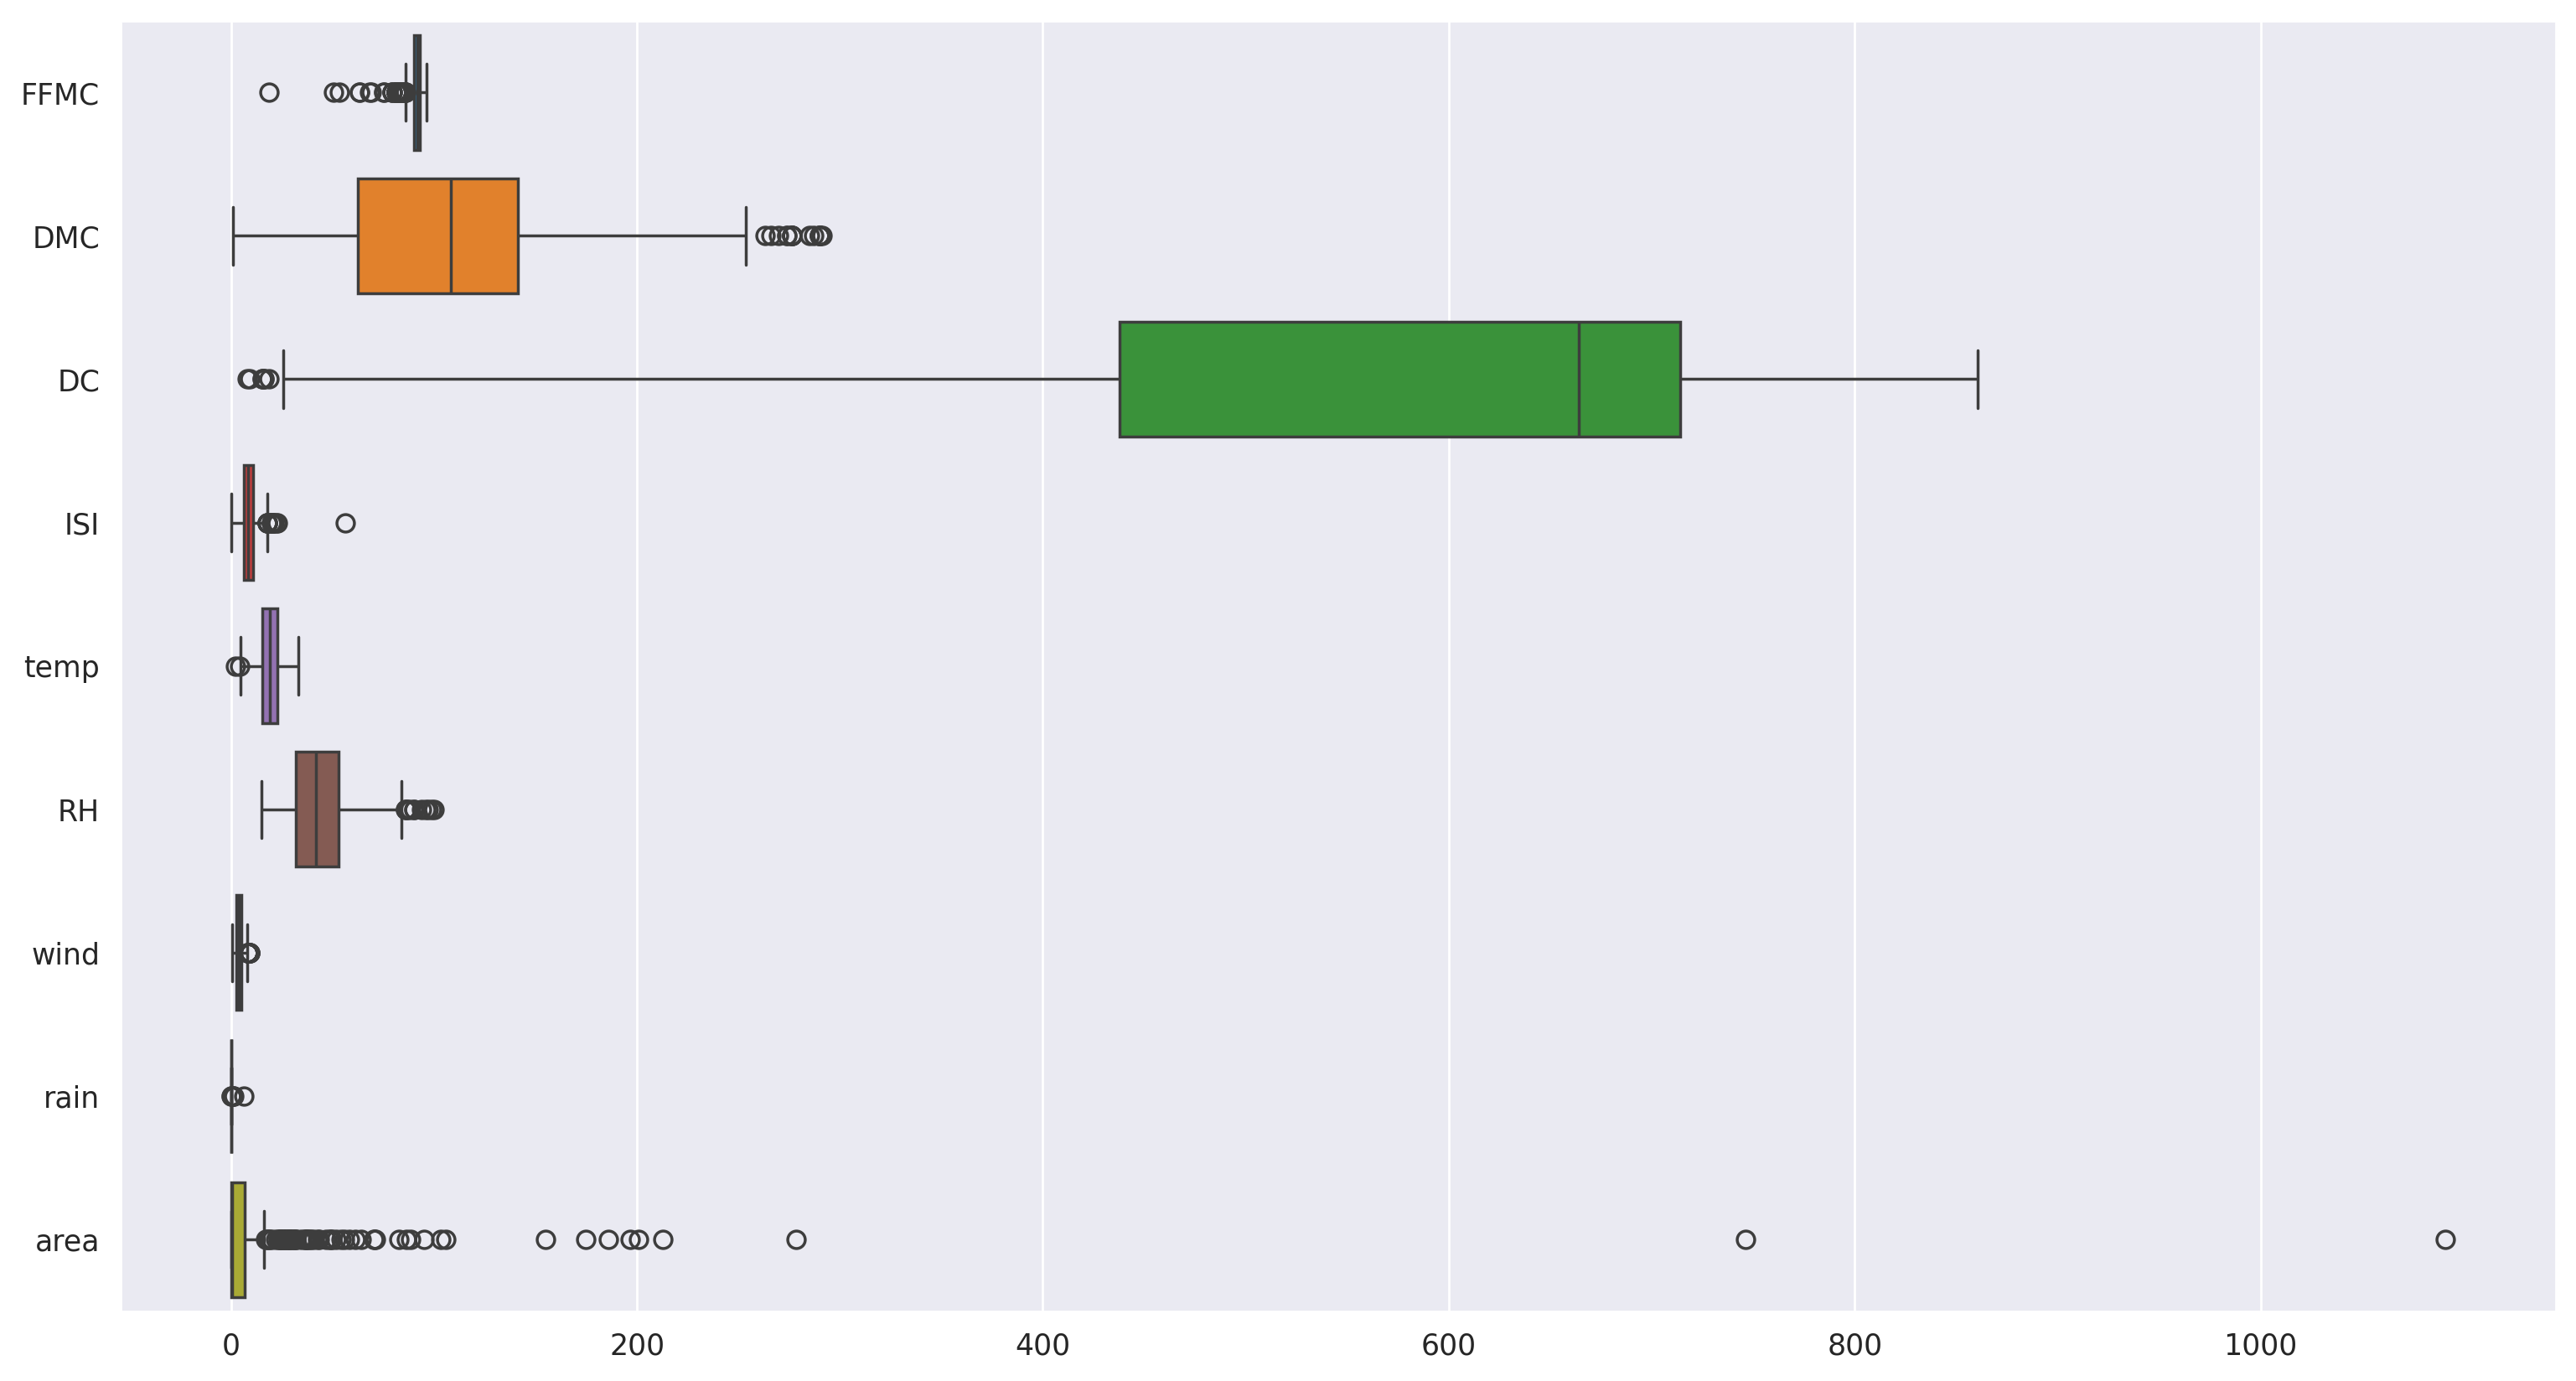

In [15]:
sns.cubehelix_palette(as_cmap=True)
sns.boxplot(data=ff.iloc[:,2:11],orient='h')

#### Ploting Histplot

array([[<Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>],
       [<Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'temp'}>, <Axes: title={'center': 'RH'}>],
       [<Axes: title={'center': 'wind'}>,
        <Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'area'}>]], dtype=object)

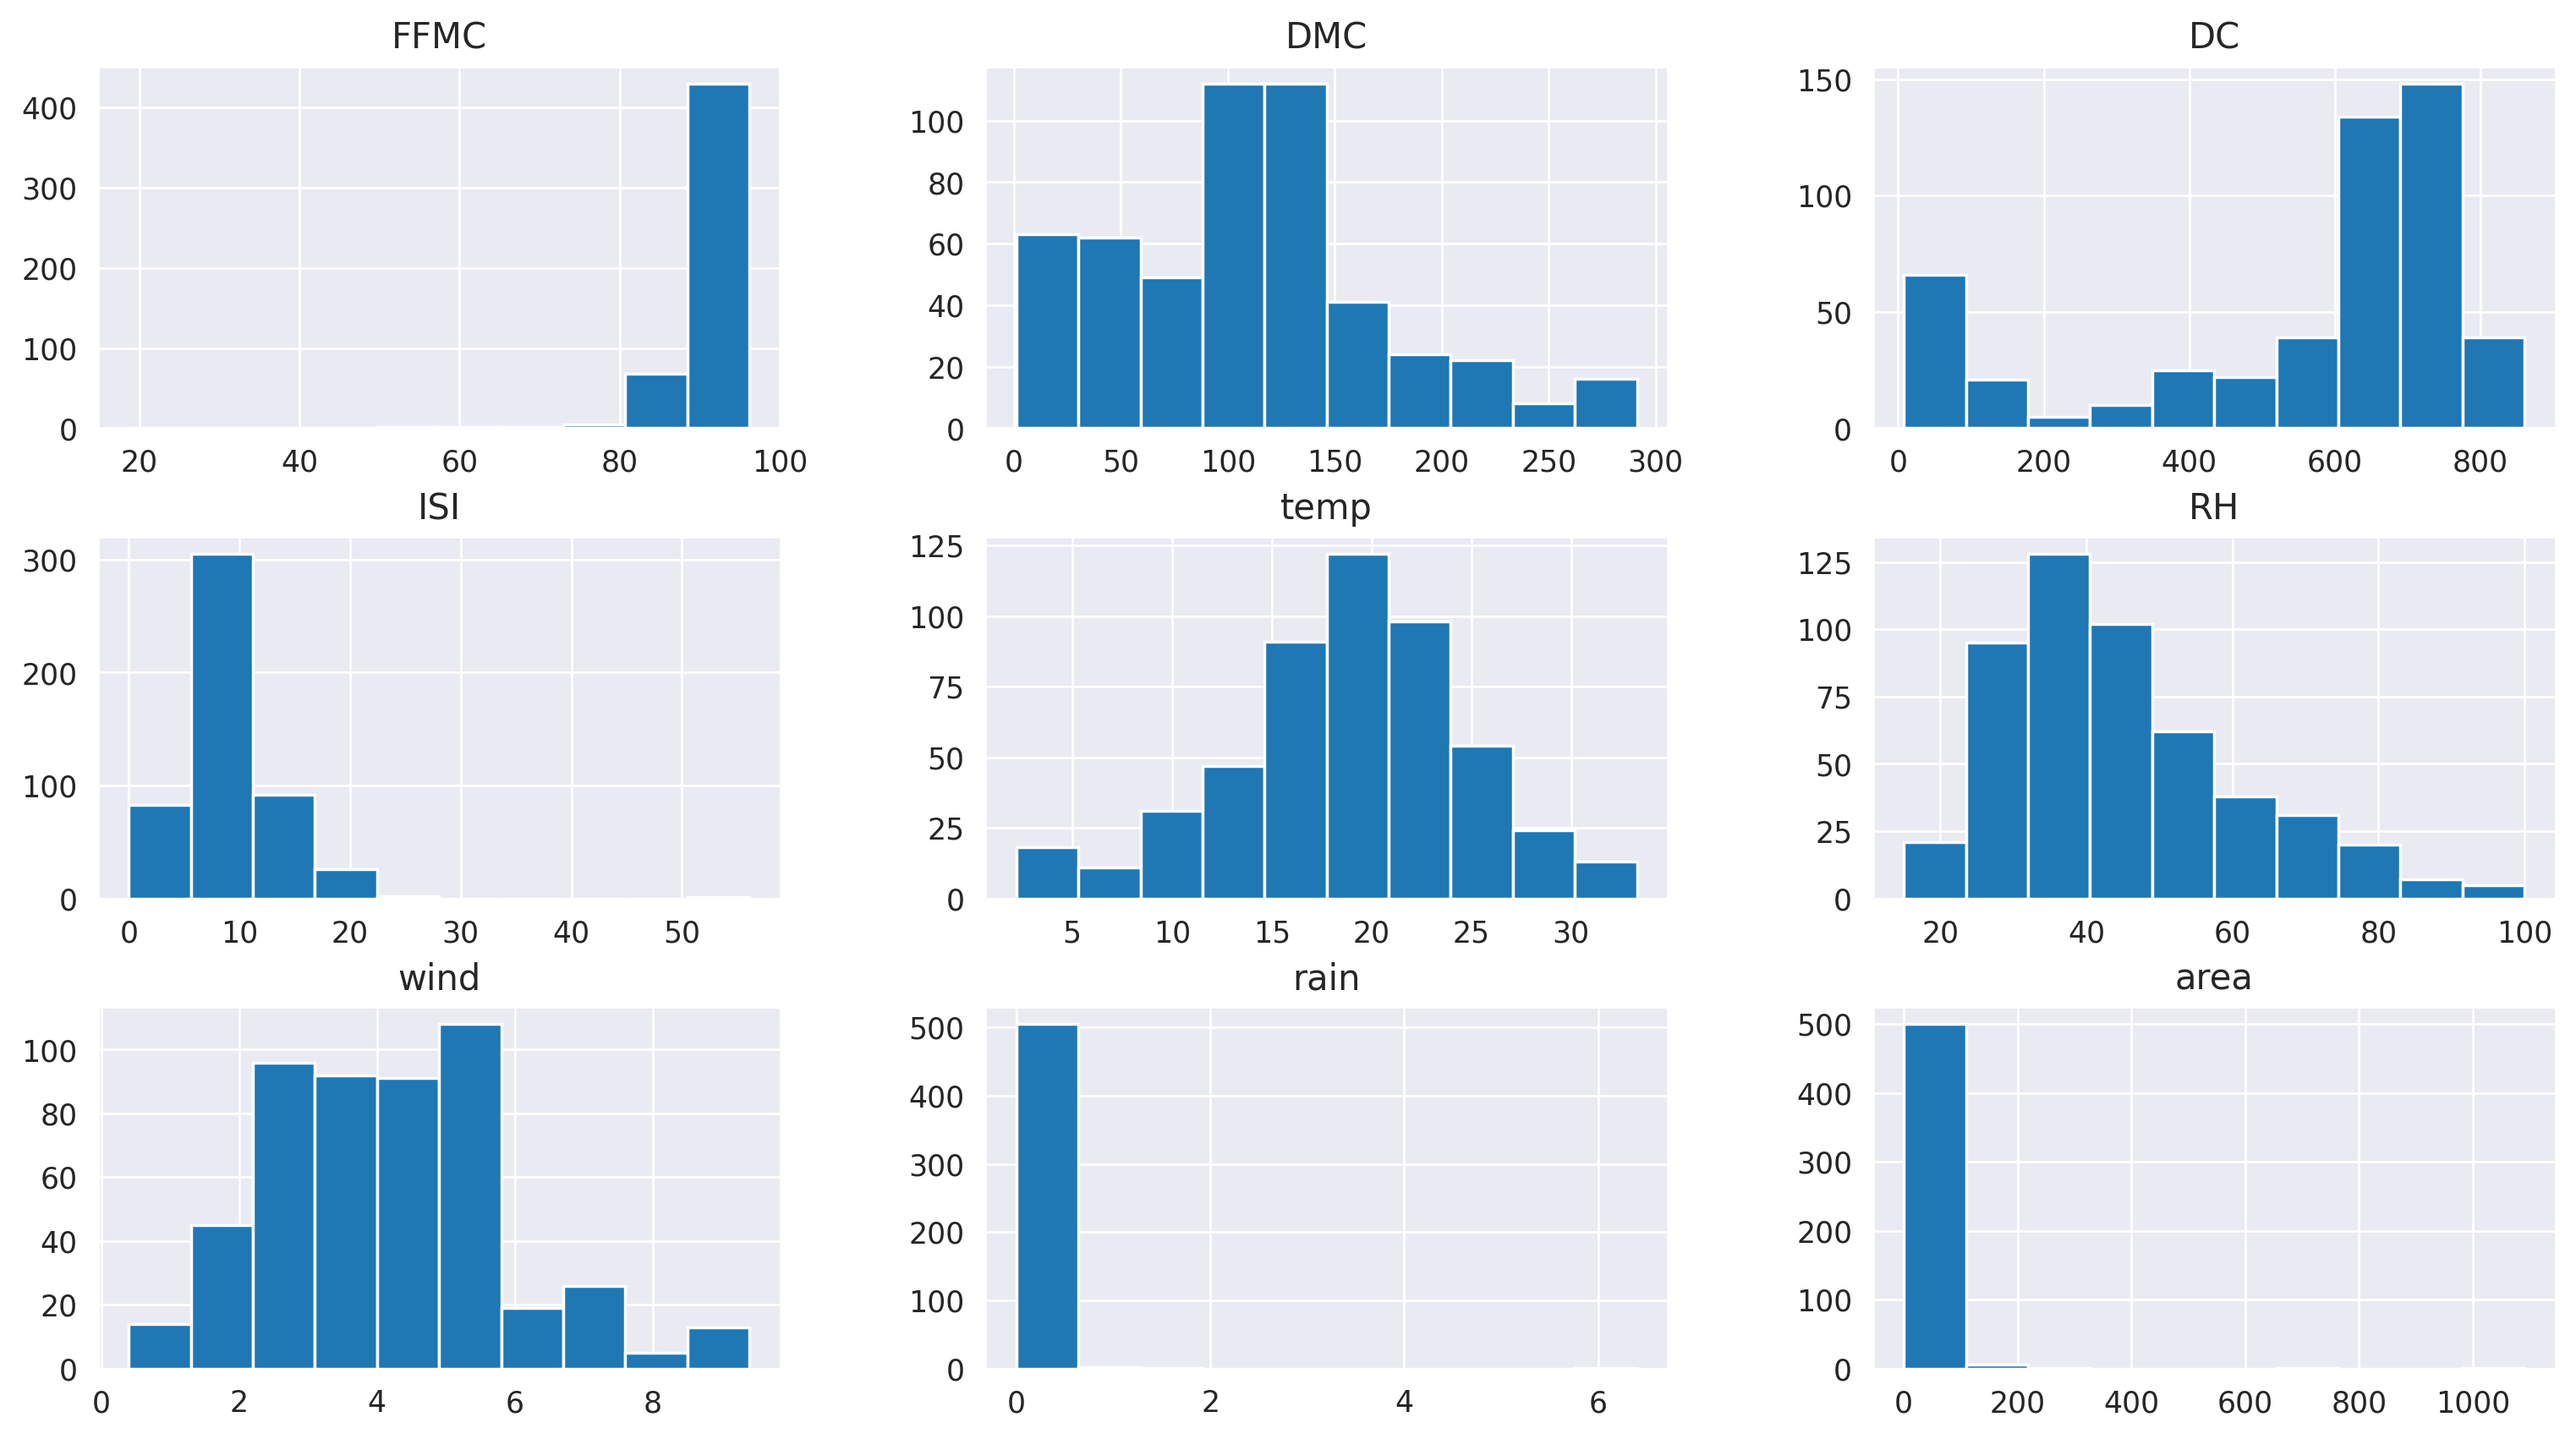

In [16]:
ff.iloc[:,2:11].hist()

#### Ploting Pie-Plot

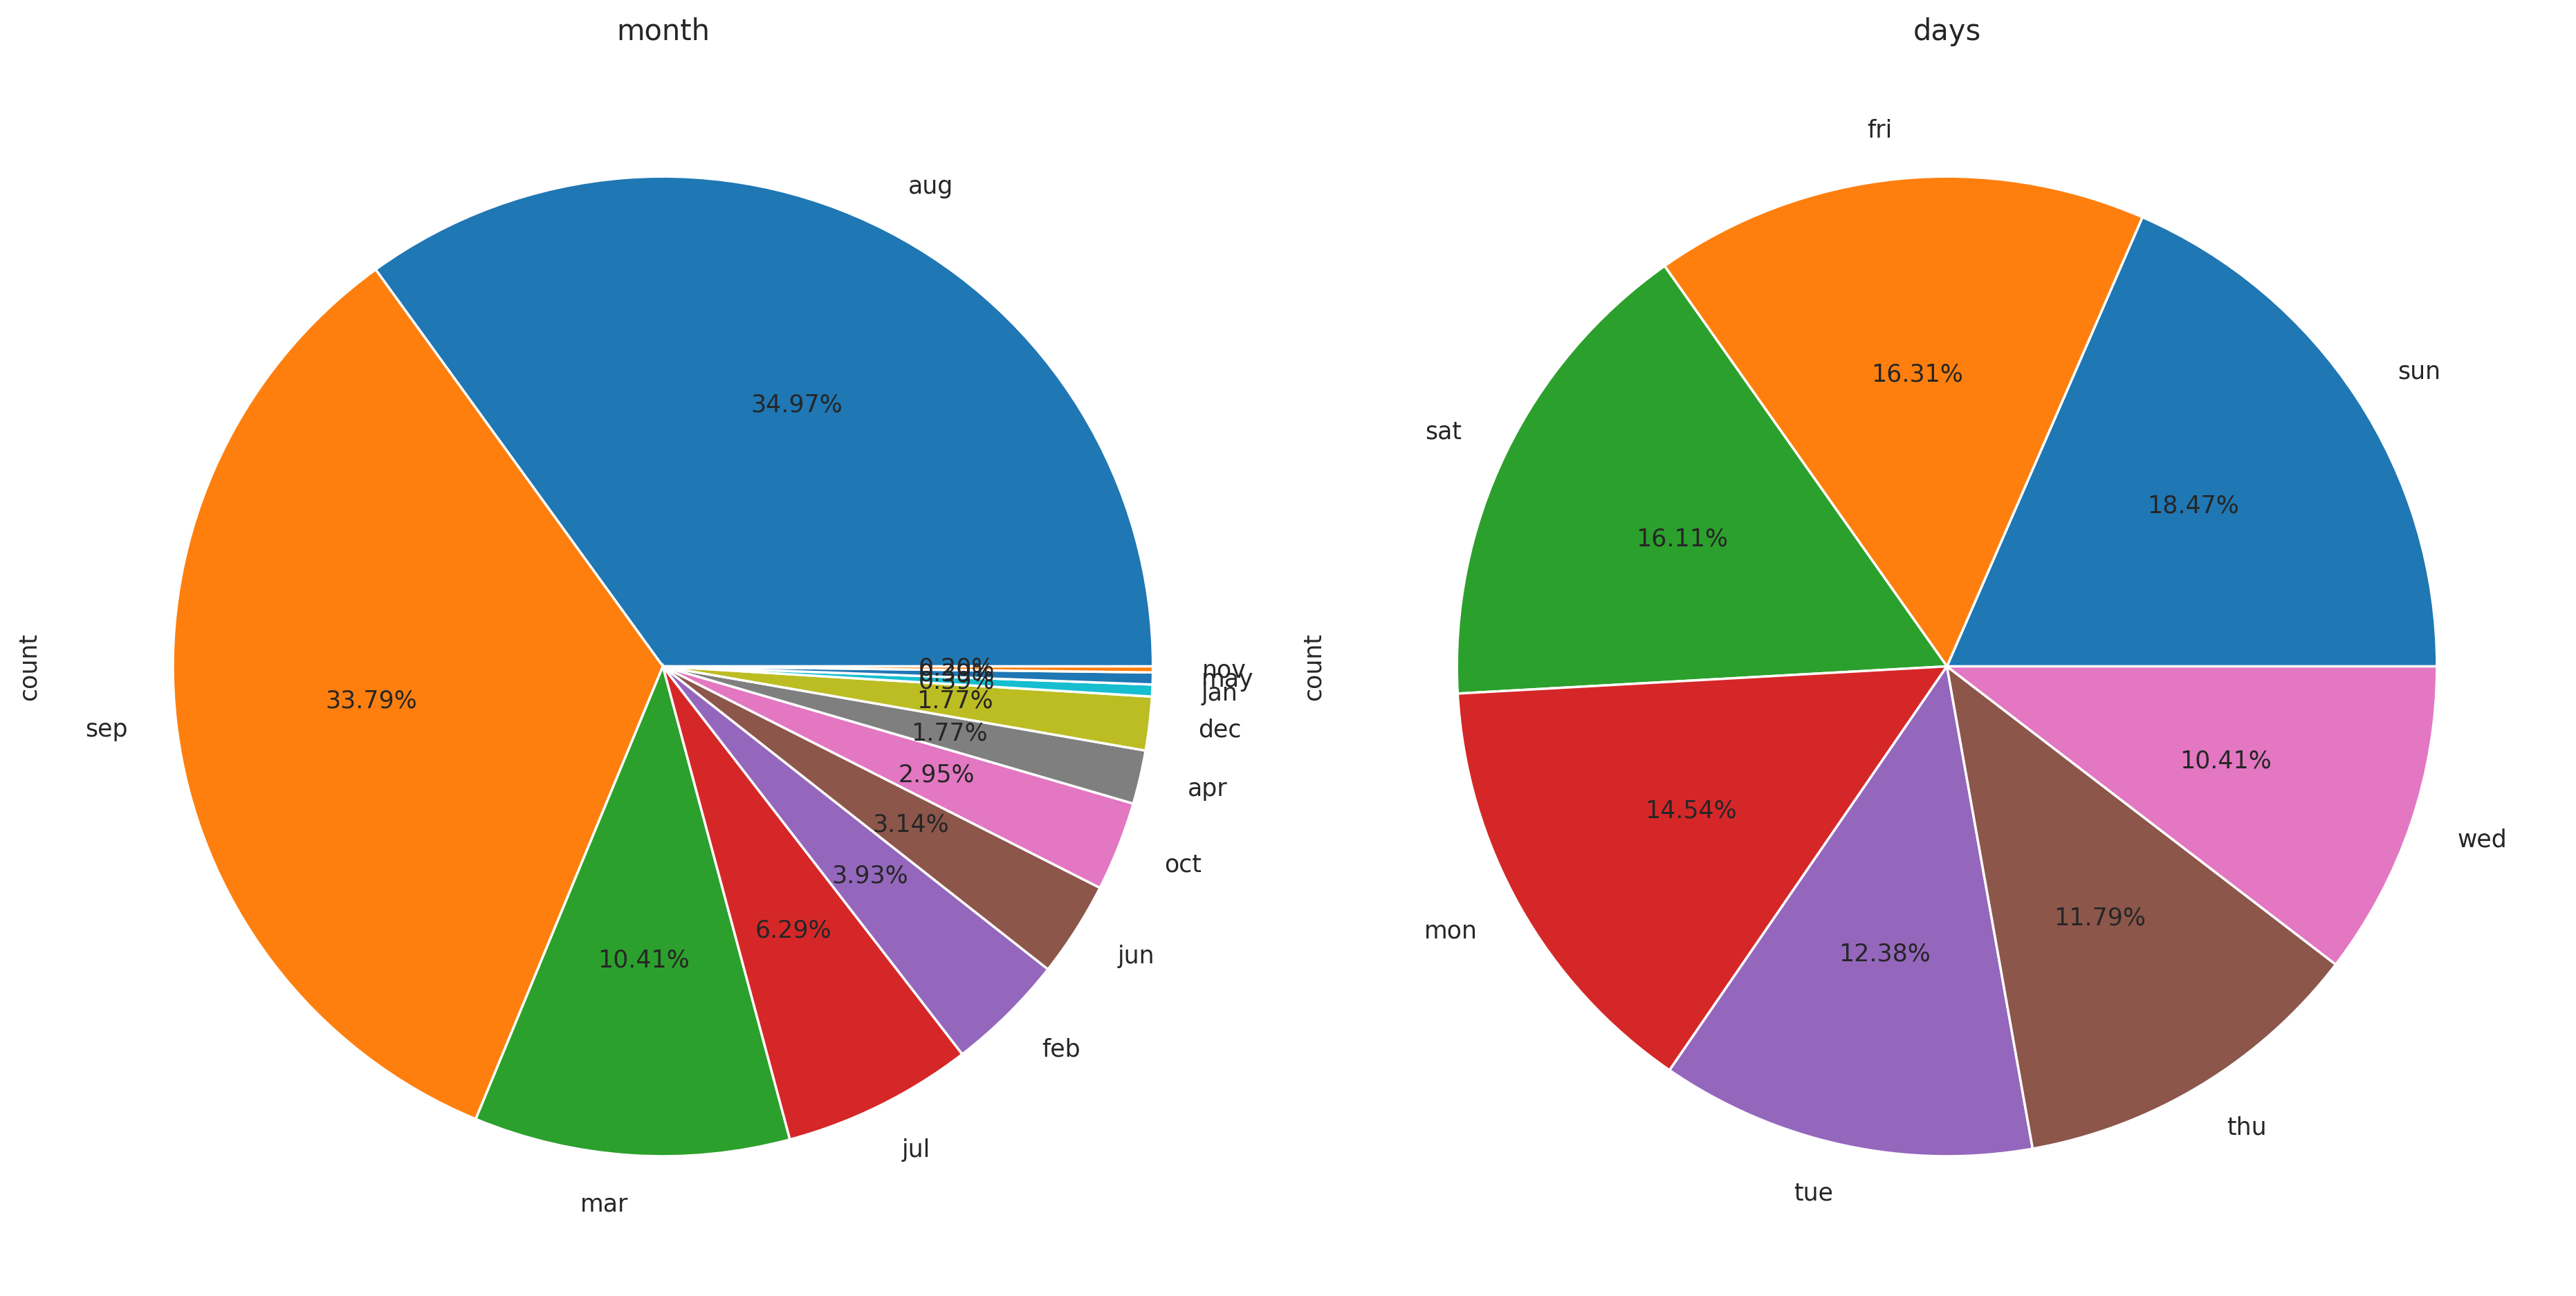

In [17]:
fig, ax = plt.subplots(ncols=2)
ax[0].title.set_text('month')
ff['month'].value_counts().plot(kind='pie', autopct = '%0.2f%%', ax= ax[0])
ax[1].title.set_text('days')
ff['day'].value_counts().plot(kind='pie', autopct = '%0.2f%%', ax= ax[1])
plt.tight_layout()


### Correlation Analysis

In [18]:
p = ff.iloc[:,2:11]
p['s'] = ff['size_category']

p

FFMC    DMC     DC   ISI  temp  RH  wind  rain   area      s
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00  small
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00  small
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00  small
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00  small
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00  small
..    ...    ...    ...   ...   ...  ..   ...   ...    ...    ...
504  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44  large
505  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29  large
506  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16  large
507  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00  small
508  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00  small

[509 rows x 10 columns]

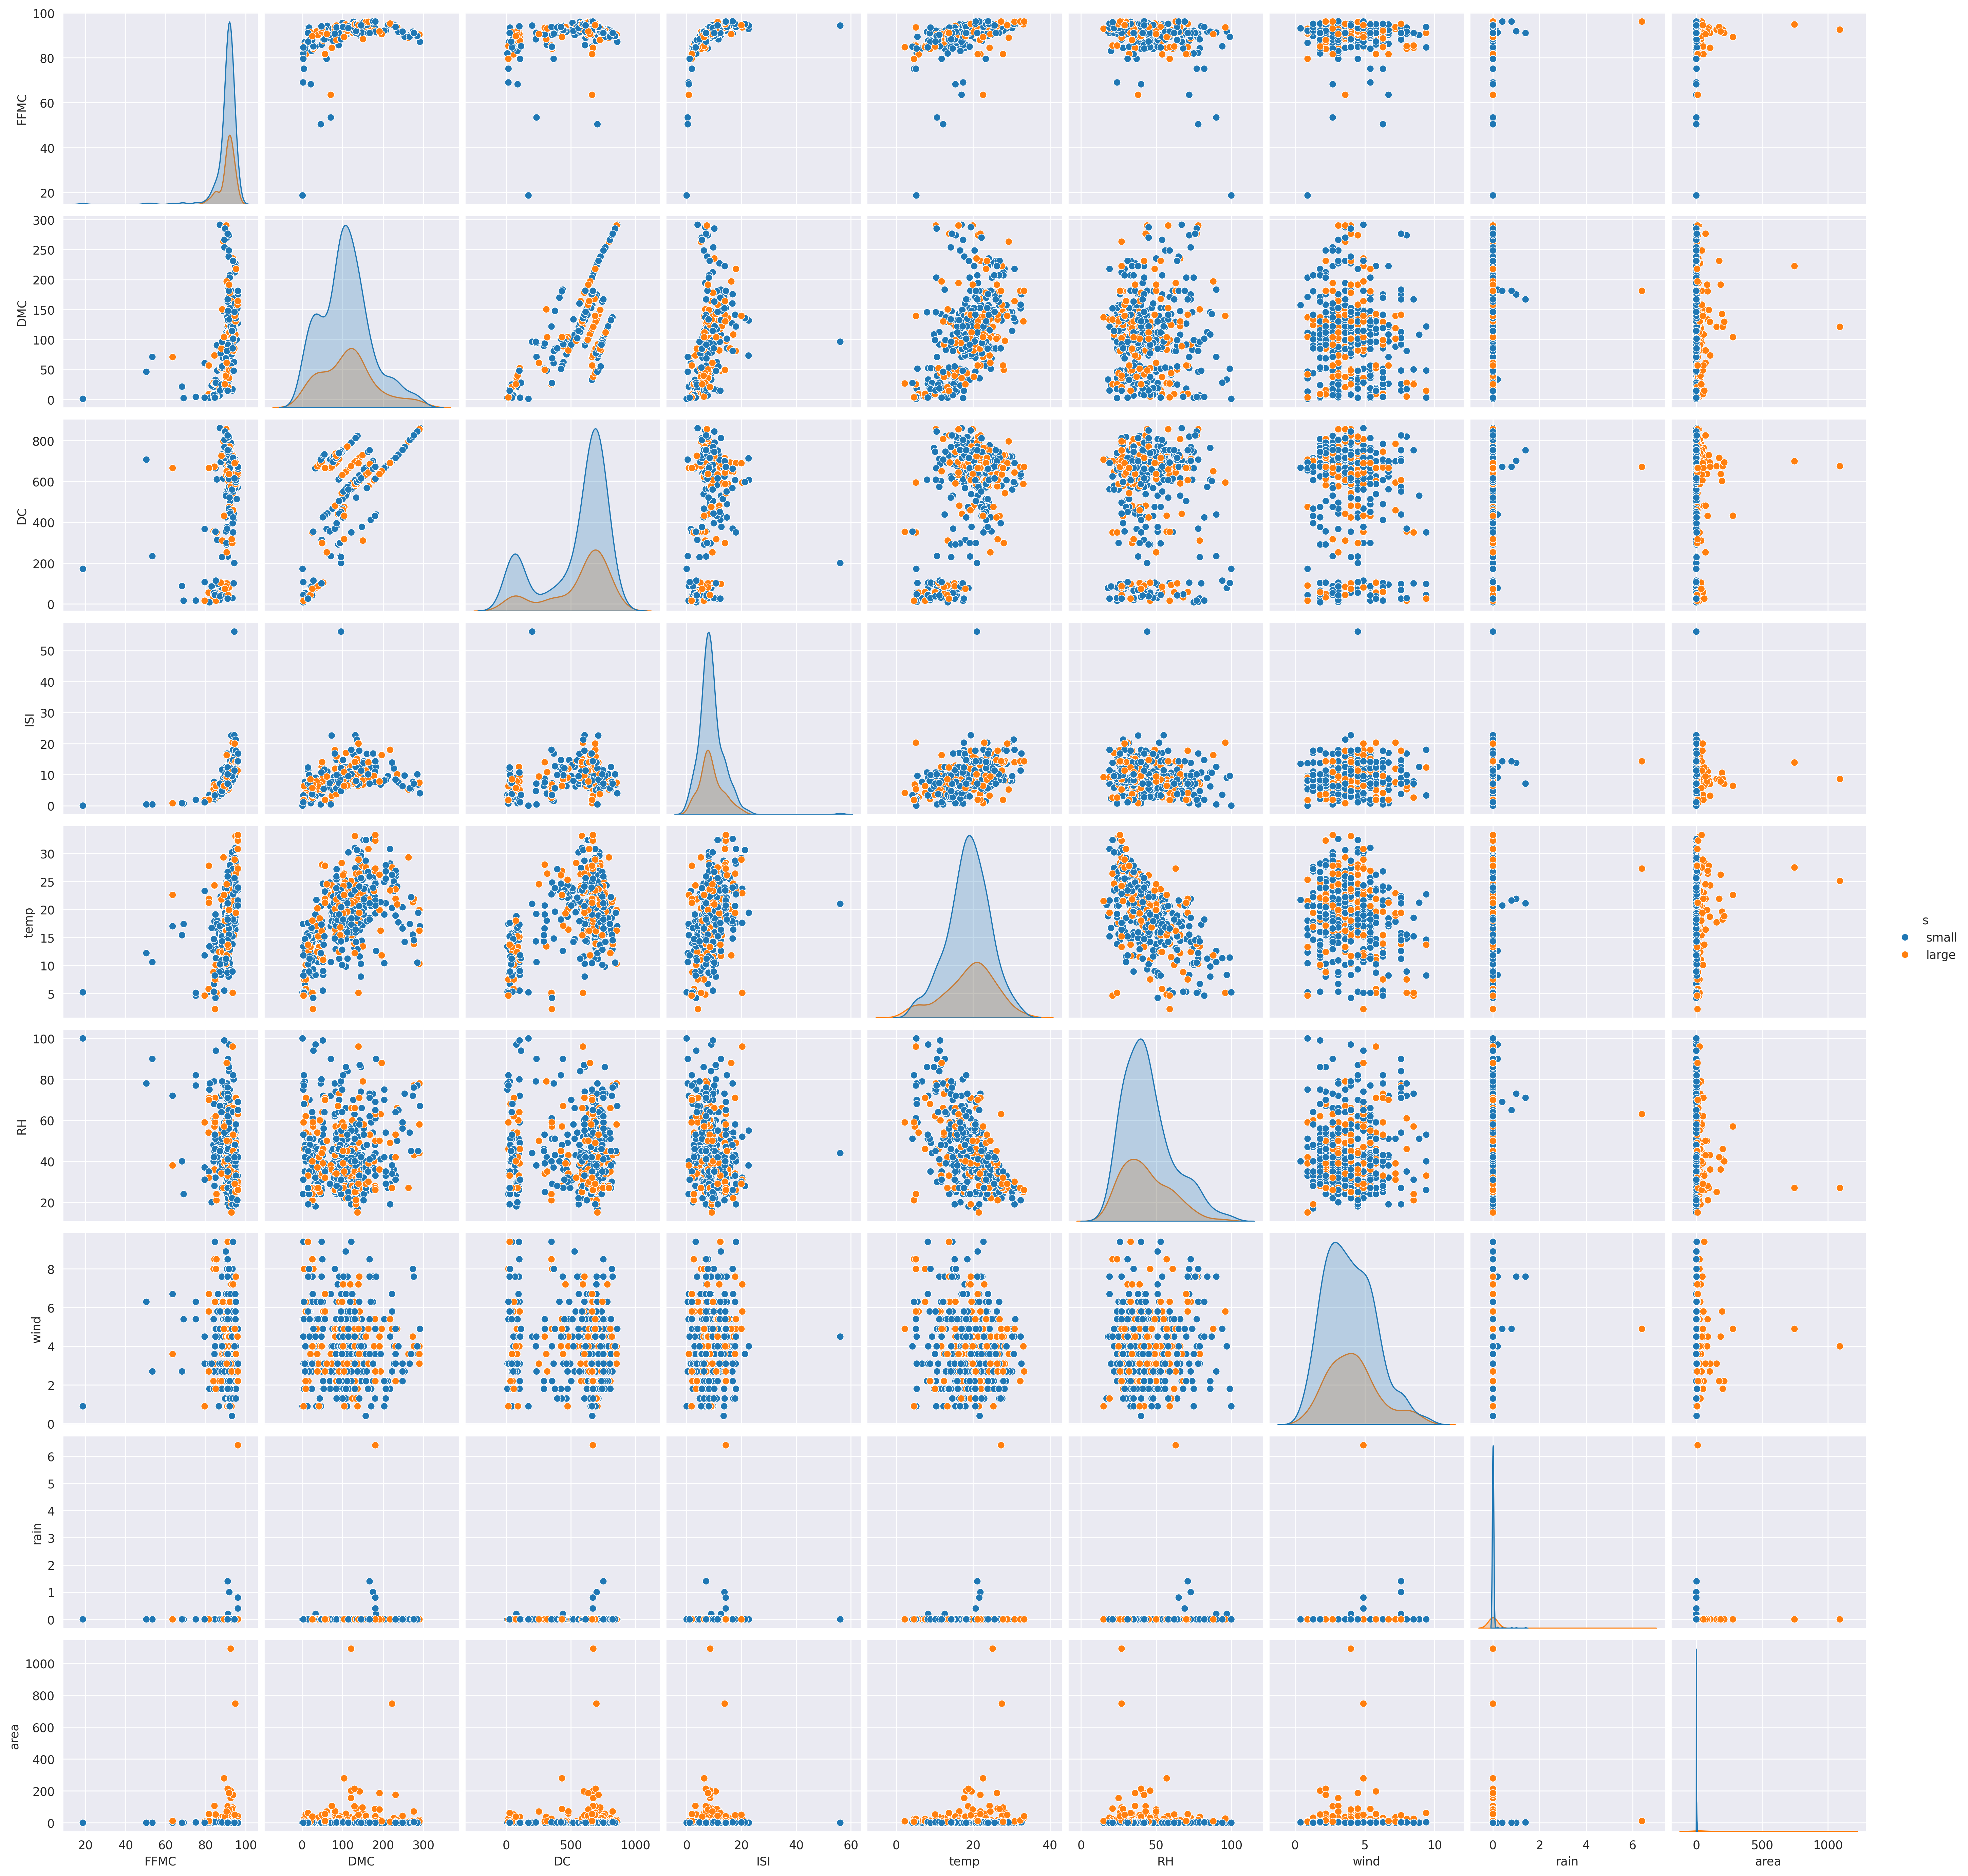

In [19]:
sns.pairplot(p, hue='s')

plt.show()

<Axes: >

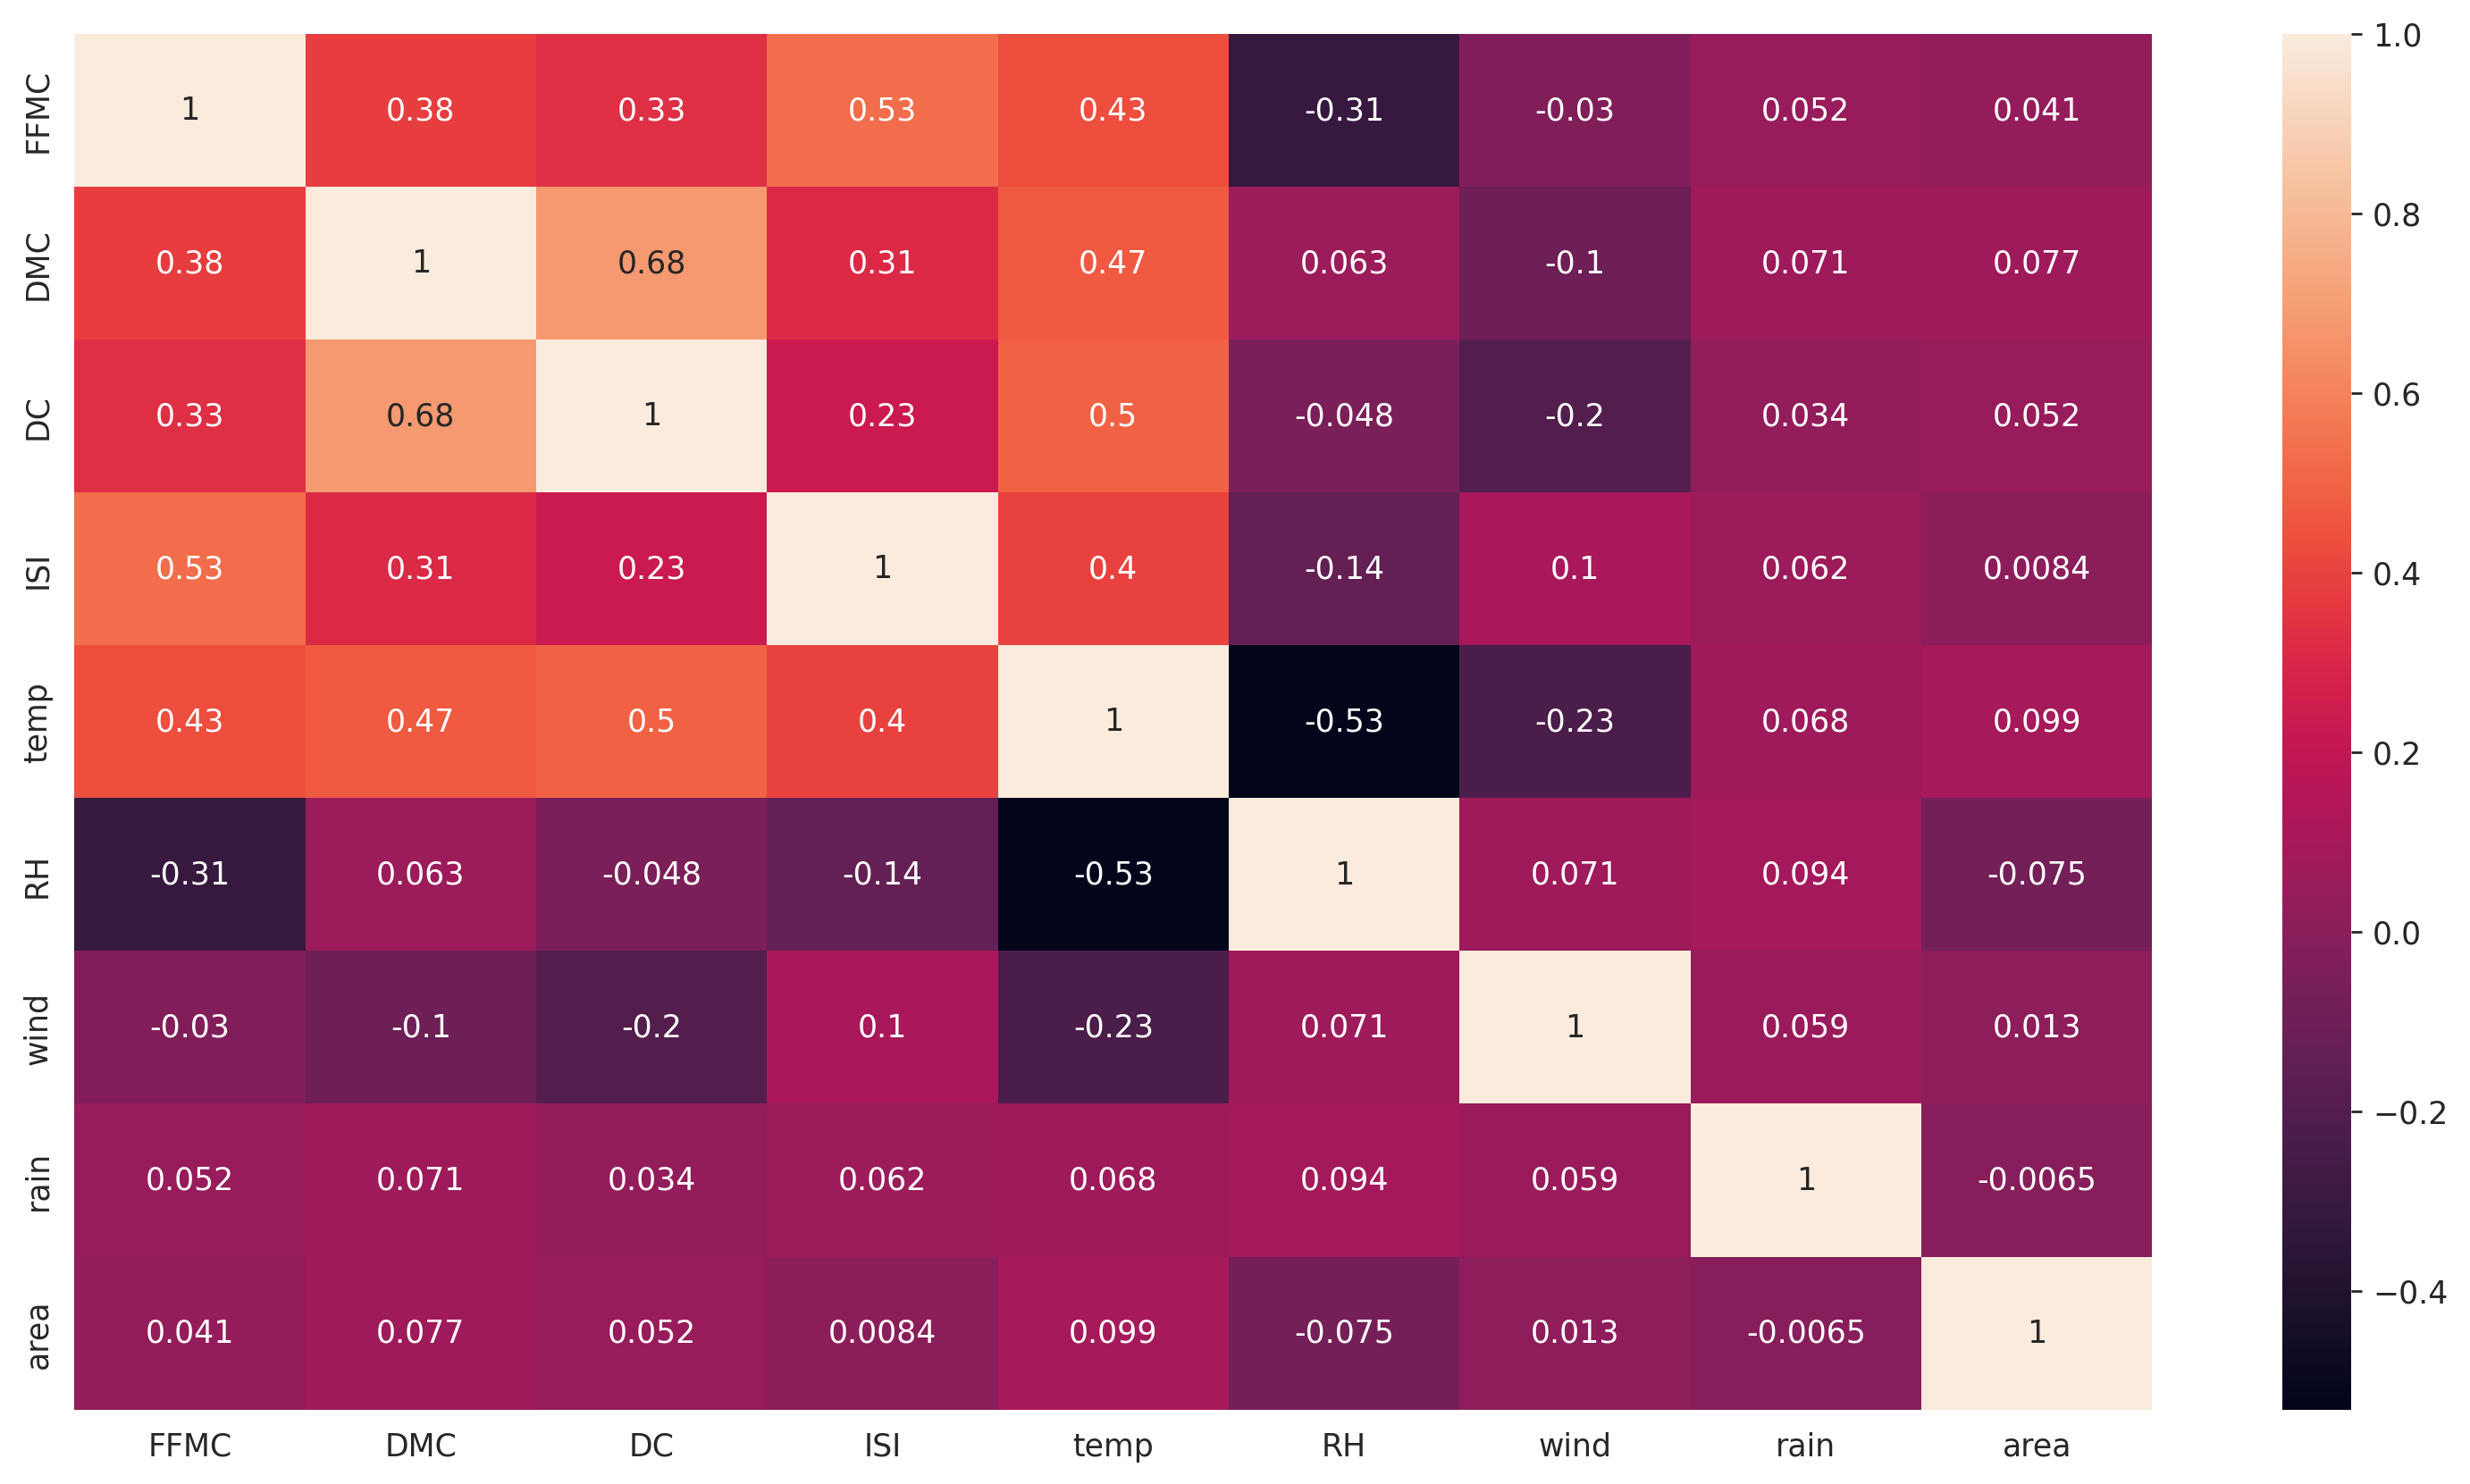

In [20]:
sns.heatmap(p.iloc[:,:-1].corr(), annot = True)

### Converting Categorical Data to Numerical Data

In [21]:
le = LabelEncoder()

#### Converting ShelveLoc Data to Numerical Data

In [22]:
ff['size_category'] = le.fit_transform(ff['size_category'])

ff

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
504   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
505   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
506   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
507   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
508   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0           0         0         0         1         0         0         0   
1           0         0         0         0         0         0         1   
2           0         0         0         0         0         0         1   
3           0         0         0         1         0         0         0   
4           0         0         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
504         0         0         0         0         0         0         0   
505         0         0         0         0         0         0         0   
506         0         0         0         0         0         0         0   
507         0         0         0         0         0         0         0   
508         0         0         0         0         0         1         0   

     monthsep  size_category  
0           0              1  
1           0              1  
2           0              1  
3           0              1  
4           0              1  
..        ...            ...  
504         0              0  
505         0              0  
506         0              0  
507         0              1  
508         0              1  

[509 rows x 31 columns]

### Outlier Detection

In [23]:
def outlier_percentage(df):
    for i in range(len(df.columns)):

        q1 = df[df.columns[i]].quantile(0.25)
        q3 = df[df.columns[i]].quantile(0.75)
        iqr = q3-q1

        upper = q3 + (iqr*1.5)
        lower = q1 - (iqr*1.5)

        percentage = (((len(df[df[df.columns[i]] > upper])) +
                      (len(df[df[df.columns[i]] < lower])))/len(df[df.columns[i]]))*100

        print(str(df.columns[i]) + ' : ' + str(percentage) + ' %')


In [24]:
def replace_outlier_extream(st, col):

    q1 = st[col].quantile(0.25)
    q3 = st[col].quantile(0.75)
    iqr = q3-q1

    upper = q3 + (iqr*1.5)
    lower = q1 - (iqr*1.5)

    st[col].mask(st[col] > upper, upper, inplace=True)
    st[col].mask(st[col] < lower, lower, inplace=True)


In [25]:
def remove_outlier(st, col):
    q1 = st[col].quantile(0.25)
    q3 = st[col].quantile(0.75)

    iqr = q3-q1

    upper = q3 + (iqr*1.5)
    lower = q1 - (iqr*1.5)

    st = st[(st[col] > lower) & (st[col] < upper)]

    return st


#### Outlier Percentage (Before)

In [26]:
outlier_percentage(ff.iloc[:,2:11])

FFMC : 10.412573673870334 %
DMC : 3.143418467583497 %
DC : 1.5717092337917484 %
ISI : 2.75049115913556 %
temp : 0.3929273084479371 %
RH : 2.161100196463654 %
wind : 2.5540275049115913 %
rain : 1.37524557956778 %
area : 12.180746561886052 %


#### Using Isolation Forest

In [27]:
iso = IsolationForest()
iso.fit(ff.iloc[:,2:11])
outliers = iso.predict(ff.iloc[:,2:11])
outliers

array([ 1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

##### Creating Dataframe

In [28]:
ff['Outliers'] = outliers
ff

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthjan  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
504   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
505   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
506   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
507   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
508   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  monthsep  \
0           0         0         1         0         0         0         0   
1           0         0         0         0         0         1         0   
2           0         0         0         0         0         1         0   
3           0         0         1         0         0         0         0   
4           0         0         1         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
504         0         0         0         0         0         0         0   
505         0         0         0         0         0         0         0   
506         0         0         0         0         0         0         0   
507         0         0         0         0         0         0         0   
508         0         0         0         0         1         0         0   

     size_category  Outliers  
0                1         1  
1                1         1  
2                1         1  
3                1        -1  
4                1        -1  
..             ...       ...  
504              0         1  
505              0        -1  
506              0        -1  
507              1         1  
508              1        -1  

[509 rows x 32 columns]

In [29]:
ff.drop(ff[ff['Outliers']==-1].index, inplace=True)

#### Outlier Percentage (After Using Isolation Forest)

In [30]:
outlier_percentage(ff.iloc[:,2:11])

FFMC : 5.298013245033113 %
DMC : 5.298013245033113 %
DC : 14.1280353200883 %
ISI : 4.415011037527594 %
temp : 0.8830022075055187 %
RH : 2.4282560706401766 %
wind : 0.8830022075055187 %
rain : 0.44150110375275936 %
area : 12.362030905077264 %


#### Replacing Outlier in FFMC Column

In [31]:
pe.box(ff['FFMC'], orientation = 'h')

In [32]:
replace_outlier_extream(ff, 'FFMC')

In [33]:
pe.box(ff['FFMC'],orientation = 'h')

#### Replacing Outlier in DMC Column

In [34]:
pe.box(ff['DMC'], orientation = 'h')

In [35]:
replace_outlier_extream(ff, 'DMC')

In [36]:
pe.box(ff['DMC'], orientation = 'h')

#### Replacing Outlier in DC Column

In [37]:
pe.box(ff['DC'], orientation = 'h')

In [38]:
replace_outlier_extream(ff, 'DC')

In [39]:
pe.box(ff['DC'], orientation = 'h')

#### Replacing Outlier in ISI Column

In [40]:
pe.box(ff['ISI'], orientation = 'h')

In [41]:
replace_outlier_extream(ff, 'ISI')

In [42]:
pe.box(ff['ISI'], orientation = 'h')

#### Replacing Outlier in Area Column

In [43]:
pe.box(ff['area'], orientation = 'h')

In [44]:
replace_outlier_extream(ff, 'area')

In [45]:
pe.box(ff['area'], orientation = 'h')

#### Outlier Percentage (After)

In [46]:
outlier_percentage(ff.iloc[:,2:11])

FFMC : 0.0 %
DMC : 0.0 %
DC : 0.0 %
ISI : 0.0 %
temp : 0.8830022075055187 %
RH : 2.4282560706401766 %
wind : 0.8830022075055187 %
rain : 0.44150110375275936 %
area : 0.0 %


#### Reindexing Columns

In [47]:
ff.reset_index(inplace=True)
ff.drop(columns=['index', 'Outliers'], inplace=True)

ff

month  day   FFMC    DMC      DC   ISI  temp  RH  wind  rain  ...  \
0     mar  fri  87.15   26.2  251.85   5.1   8.2  51   6.7   0.0  ...   
1     oct  tue  90.60   35.4  669.10   6.7  18.0  33   0.9   0.0  ...   
2     oct  sat  90.60   43.7  686.90   6.7  14.6  33   1.3   0.0  ...   
3     aug  sun  92.30   85.3  488.00  14.7  22.2  29   5.4   0.0  ...   
4     aug  mon  92.30   88.9  495.60   8.5  24.1  27   3.1   0.0  ...   
..    ...  ...    ...    ...     ...   ...   ...  ..   ...   ...  ...   
448   aug  fri  91.00  166.9  752.60   7.1  25.9  41   3.6   0.0  ...   
449   aug  fri  91.00  166.9  752.60   7.1  18.2  62   5.4   0.0  ...   
450   aug  sun  87.15   56.7  665.60   1.9  27.8  35   2.7   0.0  ...   
451   aug  sun  87.15   56.7  665.60   1.9  27.8  32   2.7   0.0  ...   
452   aug  sat  94.40  146.0  614.70  11.3  25.6  42   4.0   0.0  ...   

     monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
0           0         0         0         0         1         0         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
448         0         0         0         0         0         0         0   
449         0         0         0         0         0         0         0   
450         0         0         0         0         0         0         0   
451         0         0         0         0         0         0         0   
452         0         0         0         0         0         0         0   

     monthoct  monthsep  size_category  
0           0         0              1  
1           1         0              1  
2           1         0              1  
3           0         0              1  
4           0         0              1  
..        ...       ...            ...  
448         0         0              1  
449         0         0              1  
450         0         0              1  
451         0         0              0  
452         0         0              1  

[453 rows x 31 columns]

## Splitting The Data Into Target and Independent set

In [48]:
x = ff.iloc[:,2:-1]
y = ff['size_category']

In [49]:
x

FFMC    DMC      DC   ISI  temp  RH  wind  rain  area  dayfri  ...  \
0    87.15   26.2  251.85   5.1   8.2  51   6.7   0.0  0.00       1  ...   
1    90.60   35.4  669.10   6.7  18.0  33   0.9   0.0  0.00       0  ...   
2    90.60   43.7  686.90   6.7  14.6  33   1.3   0.0  0.00       0  ...   
3    92.30   85.3  488.00  14.7  22.2  29   5.4   0.0  0.00       0  ...   
4    92.30   88.9  495.60   8.5  24.1  27   3.1   0.0  0.00       0  ...   
..     ...    ...     ...   ...   ...  ..   ...   ...   ...     ...  ...   
448  91.00  166.9  752.60   7.1  25.9  41   3.6   0.0  0.00       1  ...   
449  91.00  166.9  752.60   7.1  18.2  62   5.4   0.0  0.43       1  ...   
450  87.15   56.7  665.60   1.9  27.8  35   2.7   0.0  0.00       0  ...   
451  87.15   56.7  665.60   1.9  27.8  32   2.7   0.0  6.44       0  ...   
452  94.40  146.0  614.70  11.3  25.6  42   4.0   0.0  0.00       0  ...   

     monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  \
0           0         0         0         0         0         1         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
448         0         0         0         0         0         0         0   
449         0         0         0         0         0         0         0   
450         0         0         0         0         0         0         0   
451         0         0         0         0         0         0         0   
452         0         0         0         0         0         0         0   

     monthnov  monthoct  monthsep  
0           0         0         0  
1           0         1         0  
2           0         1         0  
3           0         0         0  
4           0         0         0  
..        ...       ...       ...  
448         0         0         0  
449         0         0         0  
450         0         0         0  
451         0         0         0  
452         0         0         0  

[453 rows x 28 columns]

### Normalizing The Dataset

In [50]:
sc = StandardScaler()
scaled_x  = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

In [51]:
scaled_x

FFMC       DMC        DC       ISI      temp        RH      wind  \
0   -2.193318 -1.596002 -1.975044 -1.160169 -2.288560  0.625773  1.783543   
1   -0.536683 -1.427050  0.405134 -0.716333 -0.347364 -0.658211 -1.804025   
2   -0.536683 -1.274626  0.506673 -0.716333 -1.020840 -0.658211 -1.556606   
3    0.279630 -0.510668 -0.627940  1.502843  0.484578 -0.943540  0.979433   
4    0.279630 -0.444556 -0.584587 -0.217019  0.860932 -1.086205 -0.443223   
..        ...       ...       ...       ...       ...       ...       ...   
448 -0.344609  0.987866  0.881454 -0.605375  1.217478 -0.087551 -0.133950   
449 -0.344609  0.987866  0.881454 -0.605375 -0.307747  1.410429  0.979433   
450 -2.193318 -1.035889  0.385168 -2.047839  1.593833 -0.515546 -0.690642   
451 -2.193318 -1.035889  0.385168 -2.047839  1.593833 -0.729543 -0.690642   
452  1.288017  0.604050  0.094812  0.559693  1.158054 -0.016219  0.113468   

         rain      area    dayfri  ...  monthdec  monthfeb  monthjan  \
0   -0.063161 -0.683385  2.244994  ...       0.0 -0.142374       0.0   
1   -0.063161 -0.683385 -0.445435  ...       0.0 -0.142374       0.0   
2   -0.063161 -0.683385 -0.445435  ...       0.0 -0.142374       0.0   
3   -0.063161 -0.683385 -0.445435  ...       0.0 -0.142374       0.0   
4   -0.063161 -0.683385 -0.445435  ...       0.0 -0.142374       0.0   
..        ...       ...       ...  ...       ...       ...       ...   
448 -0.063161 -0.683385  2.244994  ...       0.0 -0.142374       0.0   
449 -0.063161 -0.601498  2.244994  ...       0.0 -0.142374       0.0   
450 -0.063161 -0.683385 -0.445435  ...       0.0 -0.142374       0.0   
451 -0.063161  0.543018 -0.445435  ...       0.0 -0.142374       0.0   
452 -0.063161 -0.683385 -0.445435  ...       0.0 -0.142374       0.0   

     monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  monthsep  
0   -0.266312  -0.17858  2.939098 -0.047036       0.0 -0.185058 -0.749713  
1   -0.266312  -0.17858 -0.340240 -0.047036       0.0  5.403702 -0.749713  
2   -0.266312  -0.17858 -0.340240 -0.047036       0.0  5.403702 -0.749713  
3   -0.266312  -0.17858 -0.340240 -0.047036       0.0 -0.185058 -0.749713  
4   -0.266312  -0.17858 -0.340240 -0.047036       0.0 -0.185058 -0.749713  
..        ...       ...       ...       ...       ...       ...       ...  
448 -0.266312  -0.17858 -0.340240 -0.047036       0.0 -0.185058 -0.749713  
449 -0.266312  -0.17858 -0.340240 -0.047036       0.0 -0.185058 -0.749713  
450 -0.266312  -0.17858 -0.340240 -0.047036       0.0 -0.185058 -0.749713  
451 -0.266312  -0.17858 -0.340240 -0.047036       0.0 -0.185058 -0.749713  
452 -0.266312  -0.17858 -0.340240 -0.047036       0.0 -0.185058 -0.749713  

[453 rows x 28 columns]

### Splitting The Data Into Training And Testing Set

In [52]:
xtrain,xtest,ytrain,ytest = train_test_split(scaled_x,y,train_size=0.75,random_state=1)

In [53]:
xtrain

FFMC       DMC        DC       ISI      temp        RH      wind  \
328  0.087557 -0.025848  0.982423 -0.771813  0.266688 -0.515546 -0.690642   
162 -0.728756 -0.297641  0.149004 -0.106060 -1.100072  0.768437 -1.247333   
292  0.231612 -0.198473  0.875179 -0.244758 -0.010626 -0.515546 -1.247333   
93  -1.401014  0.627924  0.093671 -0.078320 -1.060456  1.695758  0.979433   
394 -1.833180 -1.619876 -1.975044 -1.548524 -1.753741  1.553094 -0.443223   
..        ...       ...       ...       ...       ...       ...       ...   
255 -0.056498 -0.163581 -0.702669 -0.078320  0.464769  0.483108 -0.690642   
72  -0.776775 -0.093796 -0.389495  0.892569 -1.001032  1.695758 -0.690642   
396 -0.680738  2.126457  1.467300 -0.522155 -0.703910  1.125099 -0.133950   
235  1.191980  0.075156 -0.096857  0.476474  0.821316 -0.087551 -0.999915   
37  -0.728756 -0.297641  0.149004 -0.106060 -0.268131 -0.016219  1.783543   

         rain      area    dayfri  ...  monthdec  monthfeb  monthjan  \
328 -0.063161  0.392574 -0.445435  ...       0.0 -0.142374       0.0   
162 -0.063161 -0.016862 -0.445435  ...       0.0 -0.142374       0.0   
292 -0.063161 -0.683385 -0.445435  ...       0.0 -0.142374       0.0   
93  -0.063161 -0.683385 -0.445435  ...       0.0 -0.142374       0.0   
394 -0.063161 -0.045427 -0.445435  ...       0.0 -0.142374       0.0   
..        ...       ...       ...  ...       ...       ...       ...   
255 -0.063161 -0.683385 -0.445435  ...       0.0 -0.142374       0.0   
72  -0.063161 -0.683385  2.244994  ...       0.0 -0.142374       0.0   
396 -0.063161  1.213350  2.244994  ...       0.0 -0.142374       0.0   
235 -0.063161  0.843905 -0.445435  ...       0.0 -0.142374       0.0   
37  -0.063161 -0.683385 -0.445435  ...       0.0 -0.142374       0.0   

     monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  monthsep  
328 -0.266312  -0.17858  -0.34024 -0.047036       0.0 -0.185058  1.333844  
162 -0.266312  -0.17858  -0.34024 -0.047036       0.0 -0.185058 -0.749713  
292 -0.266312  -0.17858  -0.34024 -0.047036       0.0 -0.185058  1.333844  
93  -0.266312  -0.17858  -0.34024 -0.047036       0.0 -0.185058 -0.749713  
394 -0.266312  -0.17858  -0.34024 -0.047036       0.0 -0.185058 -0.749713  
..        ...       ...       ...       ...       ...       ...       ...  
255  3.754997  -0.17858  -0.34024 -0.047036       0.0 -0.185058 -0.749713  
72  -0.266312  -0.17858  -0.34024 -0.047036       0.0 -0.185058 -0.749713  
396 -0.266312  -0.17858  -0.34024 -0.047036       0.0 -0.185058  1.333844  
235 -0.266312  -0.17858  -0.34024 -0.047036       0.0 -0.185058 -0.749713  
37  -0.266312  -0.17858  -0.34024 -0.047036       0.0 -0.185058 -0.749713  

[339 rows x 28 columns]

## Preparing Model From The Dataset

### Creating Default Model With ANN

#### Creating ann_def Model

In [54]:
ann_def =Sequential()

##### Creating Hidden Layer

In [55]:
ann_def.add(Dense(units=30, activation='relu'))
ann_def.add(Dense(units=20, activation='relu'))

##### Creating Output Layer

In [56]:
ann_def.add(Dense(units=1, activation='sigmoid'))

##### Connecting All Neurons In Each Layer

In [57]:
ann_def.compile(optimizer='adam', loss='binary_crossentropy')

##### Fitting Data

In [58]:
ann_def.fit(xtrain, ytrain, validation_data = (xtest, ytest), epochs = 50)

Epoch 1/50
11/11 [==============================] - 1s 25ms/step - loss: 0.7448 - val_loss: 0.7401
Epoch 2/50
11/11 [==============================] - 0s 6ms/step - loss: 0.6545 - val_loss: 0.6557
Epoch 3/50
11/11 [==============================] - 0s 6ms/step - loss: 0.5982 - val_loss: 0.5957
Epoch 4/50
11/11 [==============================] - 0s 7ms/step - loss: 0.5570 - val_loss: 0.5486
Epoch 5/50
11/11 [==============================] - 0s 5ms/step - loss: 0.5195 - val_loss: 0.5082
Epoch 6/50
11/11 [==============================] - 0s 5ms/step - loss: 0.4847 - val_loss: 0.4720
Epoch 7/50
11/11 [==============================] - 0s 7ms/step - loss: 0.4488 - val_loss: 0.4338
Epoch 8/50
11/11 [==============================] - 0s 7ms/step - loss: 0.4132 - val_loss: 0.3981
Epoch 9/50
11/11 [==============================] - 0s 7ms/step - loss: 0.3780 - val_loss: 0.3590
Epoch 10/50
11/11 [==============================] - 0s 7ms/step - loss: 0.3432 - val_loss: 0.3233
Epoch 11/50
11/11 

#### Evaluating The Model

##### Ploting Line-Plot

Text(0.5, 0, 'No Of Epochs')

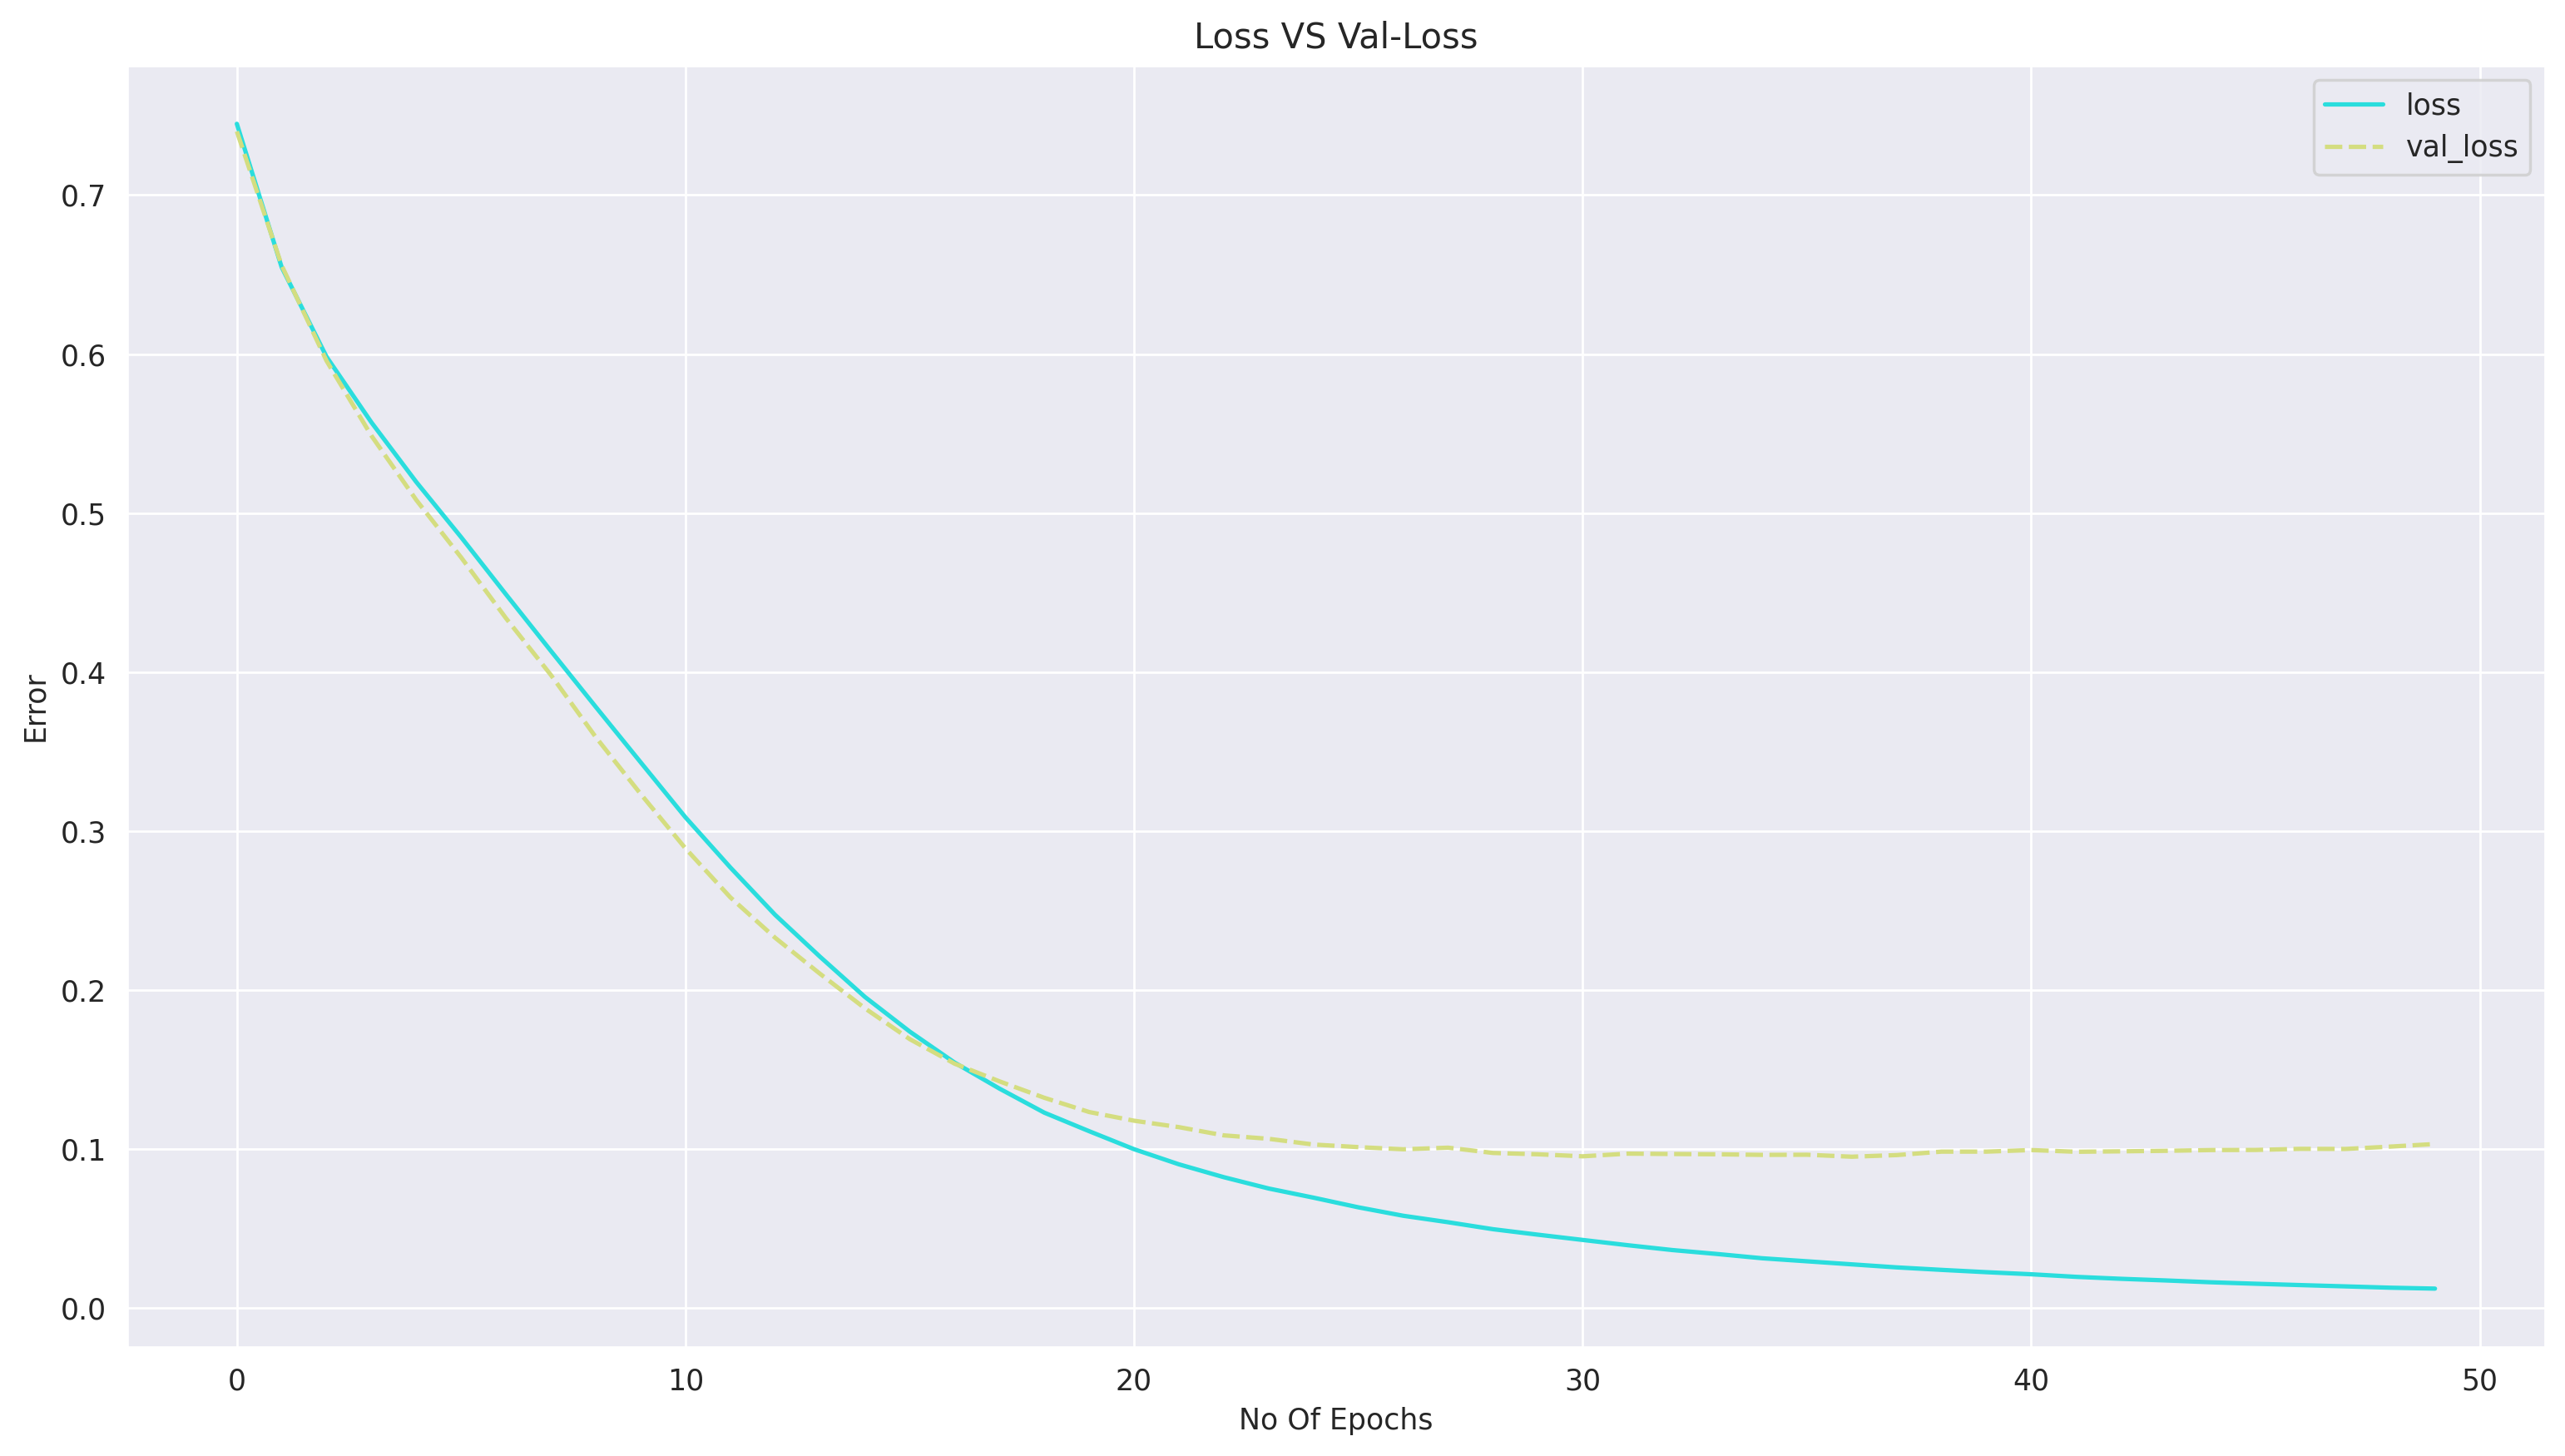

In [59]:
val_loss_def = pd.DataFrame(ann_def.history.history)

sns.lineplot(data = val_loss_def, palette='rainbow')
plt.title('Loss VS Val-Loss')
plt.ylabel('Error')
plt.xlabel('No Of Epochs')

##### Creating Classification Report

In [60]:
ypred_def = ann_def.predict(xtest)
ypred_def = ypred_def > 0.5

4/4 [==============================] - 0s 3ms/step


In [61]:
print(classification_report(ytest,ypred_def))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87        23
           1       0.98      0.96      0.97        91

    accuracy                           0.95       114
   macro avg       0.91      0.93      0.92       114
weighted avg       0.95      0.95      0.95       114



### Creating Model With Early Stopping

#### Creating ann Model

In [62]:
early = EarlyStopping(monitor='val_loss',mode='min', patience=25)

In [63]:
ann_es =Sequential()

##### Creating Hidden Layer

In [64]:
ann_es.add(Dense(units=30, activation='relu'))
ann_es.add(Dense(units=20, activation='relu'))

##### Creating Output Layer

In [65]:
ann_es.add(Dense(units=1, activation='sigmoid'))

##### Connecting All Neurons In Each Layer

In [66]:
ann_es.compile(optimizer='adam', loss='binary_crossentropy')

##### Fitting Data

In [67]:
ann_es.fit(xtrain, ytrain, validation_data = (xtest, ytest), callbacks=[early] , epochs = 100)

Epoch 1/100
11/11 [==============================] - 1s 19ms/step - loss: 0.8016 - val_loss: 0.7212
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 0.6869 - val_loss: 0.6177
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 0.6143 - val_loss: 0.5576
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 0.5675 - val_loss: 0.5159
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 0.5283 - val_loss: 0.4830
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 0.4916 - val_loss: 0.4553
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 0.4523 - val_loss: 0.4232
Epoch 8/100
11/11 [==============================] - 0s 5ms/step - loss: 0.4143 - val_loss: 0.3915
Epoch 9/100
11/11 [==============================] - 0s 6ms/step - loss: 0.3773 - val_loss: 0.3601
Epoch 10/100
11/11 [==============================] - 0s 5ms/step - loss: 0.3373 - val_loss: 0.3256
Epoch 11

#### Evaluating The Model

##### Ploting Line-Plot

Text(0.5, 0, 'No Of Epochs')

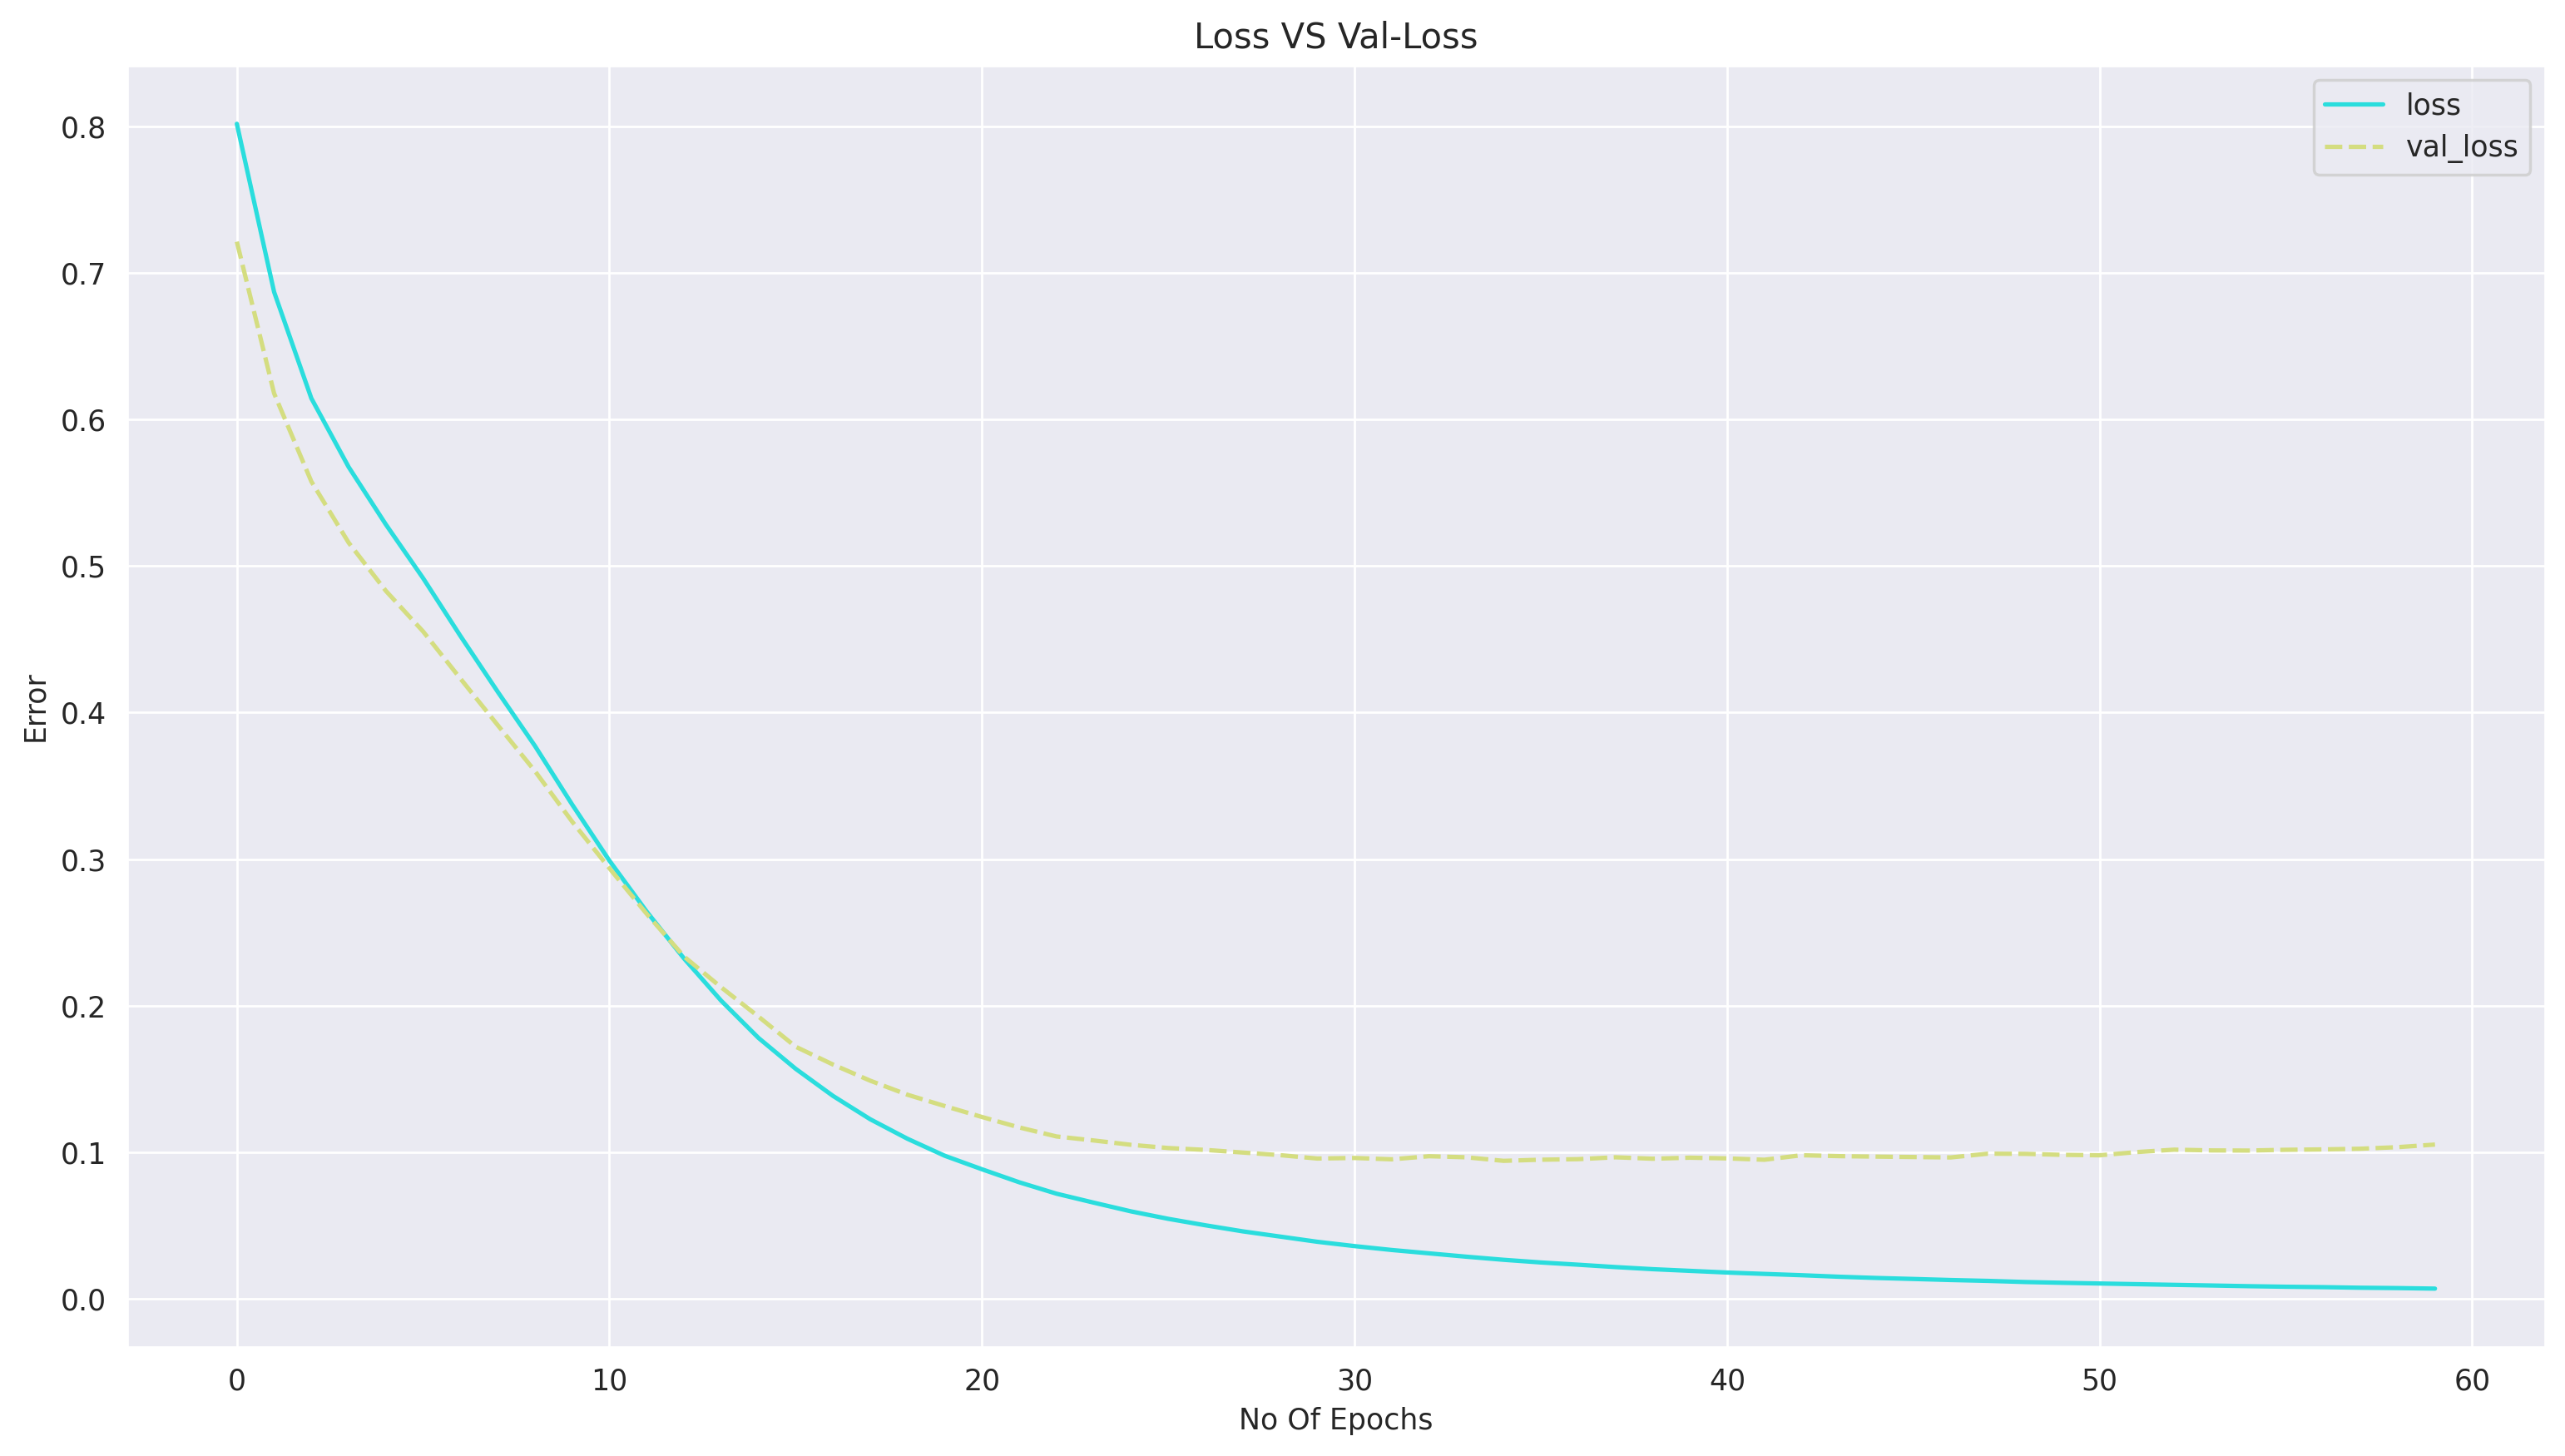

In [68]:
val_loss_es = pd.DataFrame(ann_es.history.history)

sns.lineplot(data = val_loss_es, palette='rainbow')
plt.title('Loss VS Val-Loss')
plt.ylabel('Error')
plt.xlabel('No Of Epochs')

##### Creating Classification Report

In [69]:
ypred_es = ann_es.predict(xtest)
ypred_es = ypred_es > 0.5

4/4 [==============================] - 0s 3ms/step


In [70]:
print(classification_report(ytest,ypred_es))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89        23
           1       0.98      0.97      0.97        91

    accuracy                           0.96       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.96      0.96      0.96       114



### Creating Model With Drop Out Layer

#### Creating ANN Model

In [71]:
ann_dol =Sequential()

##### Creating Hidden Layer

In [72]:
ann_dol.add(Dense(units=30, activation='relu'))
ann_dol.add(Dropout(rate=0.5))

ann_dol.add(Dense(units=20, activation='relu'))
ann_dol.add(Dropout(rate=0.5))

##### Creating Output Layer

In [73]:
ann_dol.add(Dense(units=1, activation='sigmoid'))

##### Connecting All Neurons In Each Layer

In [74]:
ann_dol.compile(optimizer='adam', loss='binary_crossentropy')

##### Fitting Data

In [75]:
ann_dol.fit(xtrain, ytrain, validation_data = (xtest, ytest), epochs = 50)

Epoch 1/50
11/11 [==============================] - 1s 19ms/step - loss: 0.9506 - val_loss: 0.7893
Epoch 2/50
11/11 [==============================] - 0s 6ms/step - loss: 0.8268 - val_loss: 0.6927
Epoch 3/50
11/11 [==============================] - 0s 7ms/step - loss: 0.7826 - val_loss: 0.6262
Epoch 4/50
11/11 [==============================] - 0s 7ms/step - loss: 0.6914 - val_loss: 0.5856
Epoch 5/50
11/11 [==============================] - 0s 5ms/step - loss: 0.7272 - val_loss: 0.5535
Epoch 6/50
11/11 [==============================] - 0s 6ms/step - loss: 0.6902 - val_loss: 0.5286
Epoch 7/50
11/11 [==============================] - 0s 5ms/step - loss: 0.6147 - val_loss: 0.5077
Epoch 8/50
11/11 [==============================] - 0s 5ms/step - loss: 0.5654 - val_loss: 0.4875
Epoch 9/50
11/11 [==============================] - 0s 6ms/step - loss: 0.5841 - val_loss: 0.4689
Epoch 10/50
11/11 [==============================] - 0s 5ms/step - loss: 0.5640 - val_loss: 0.4524
Epoch 11/50
11/11 

#### Evaluating The Model

##### Ploting Line-Plot

Text(0.5, 0, 'No Of Epochs')

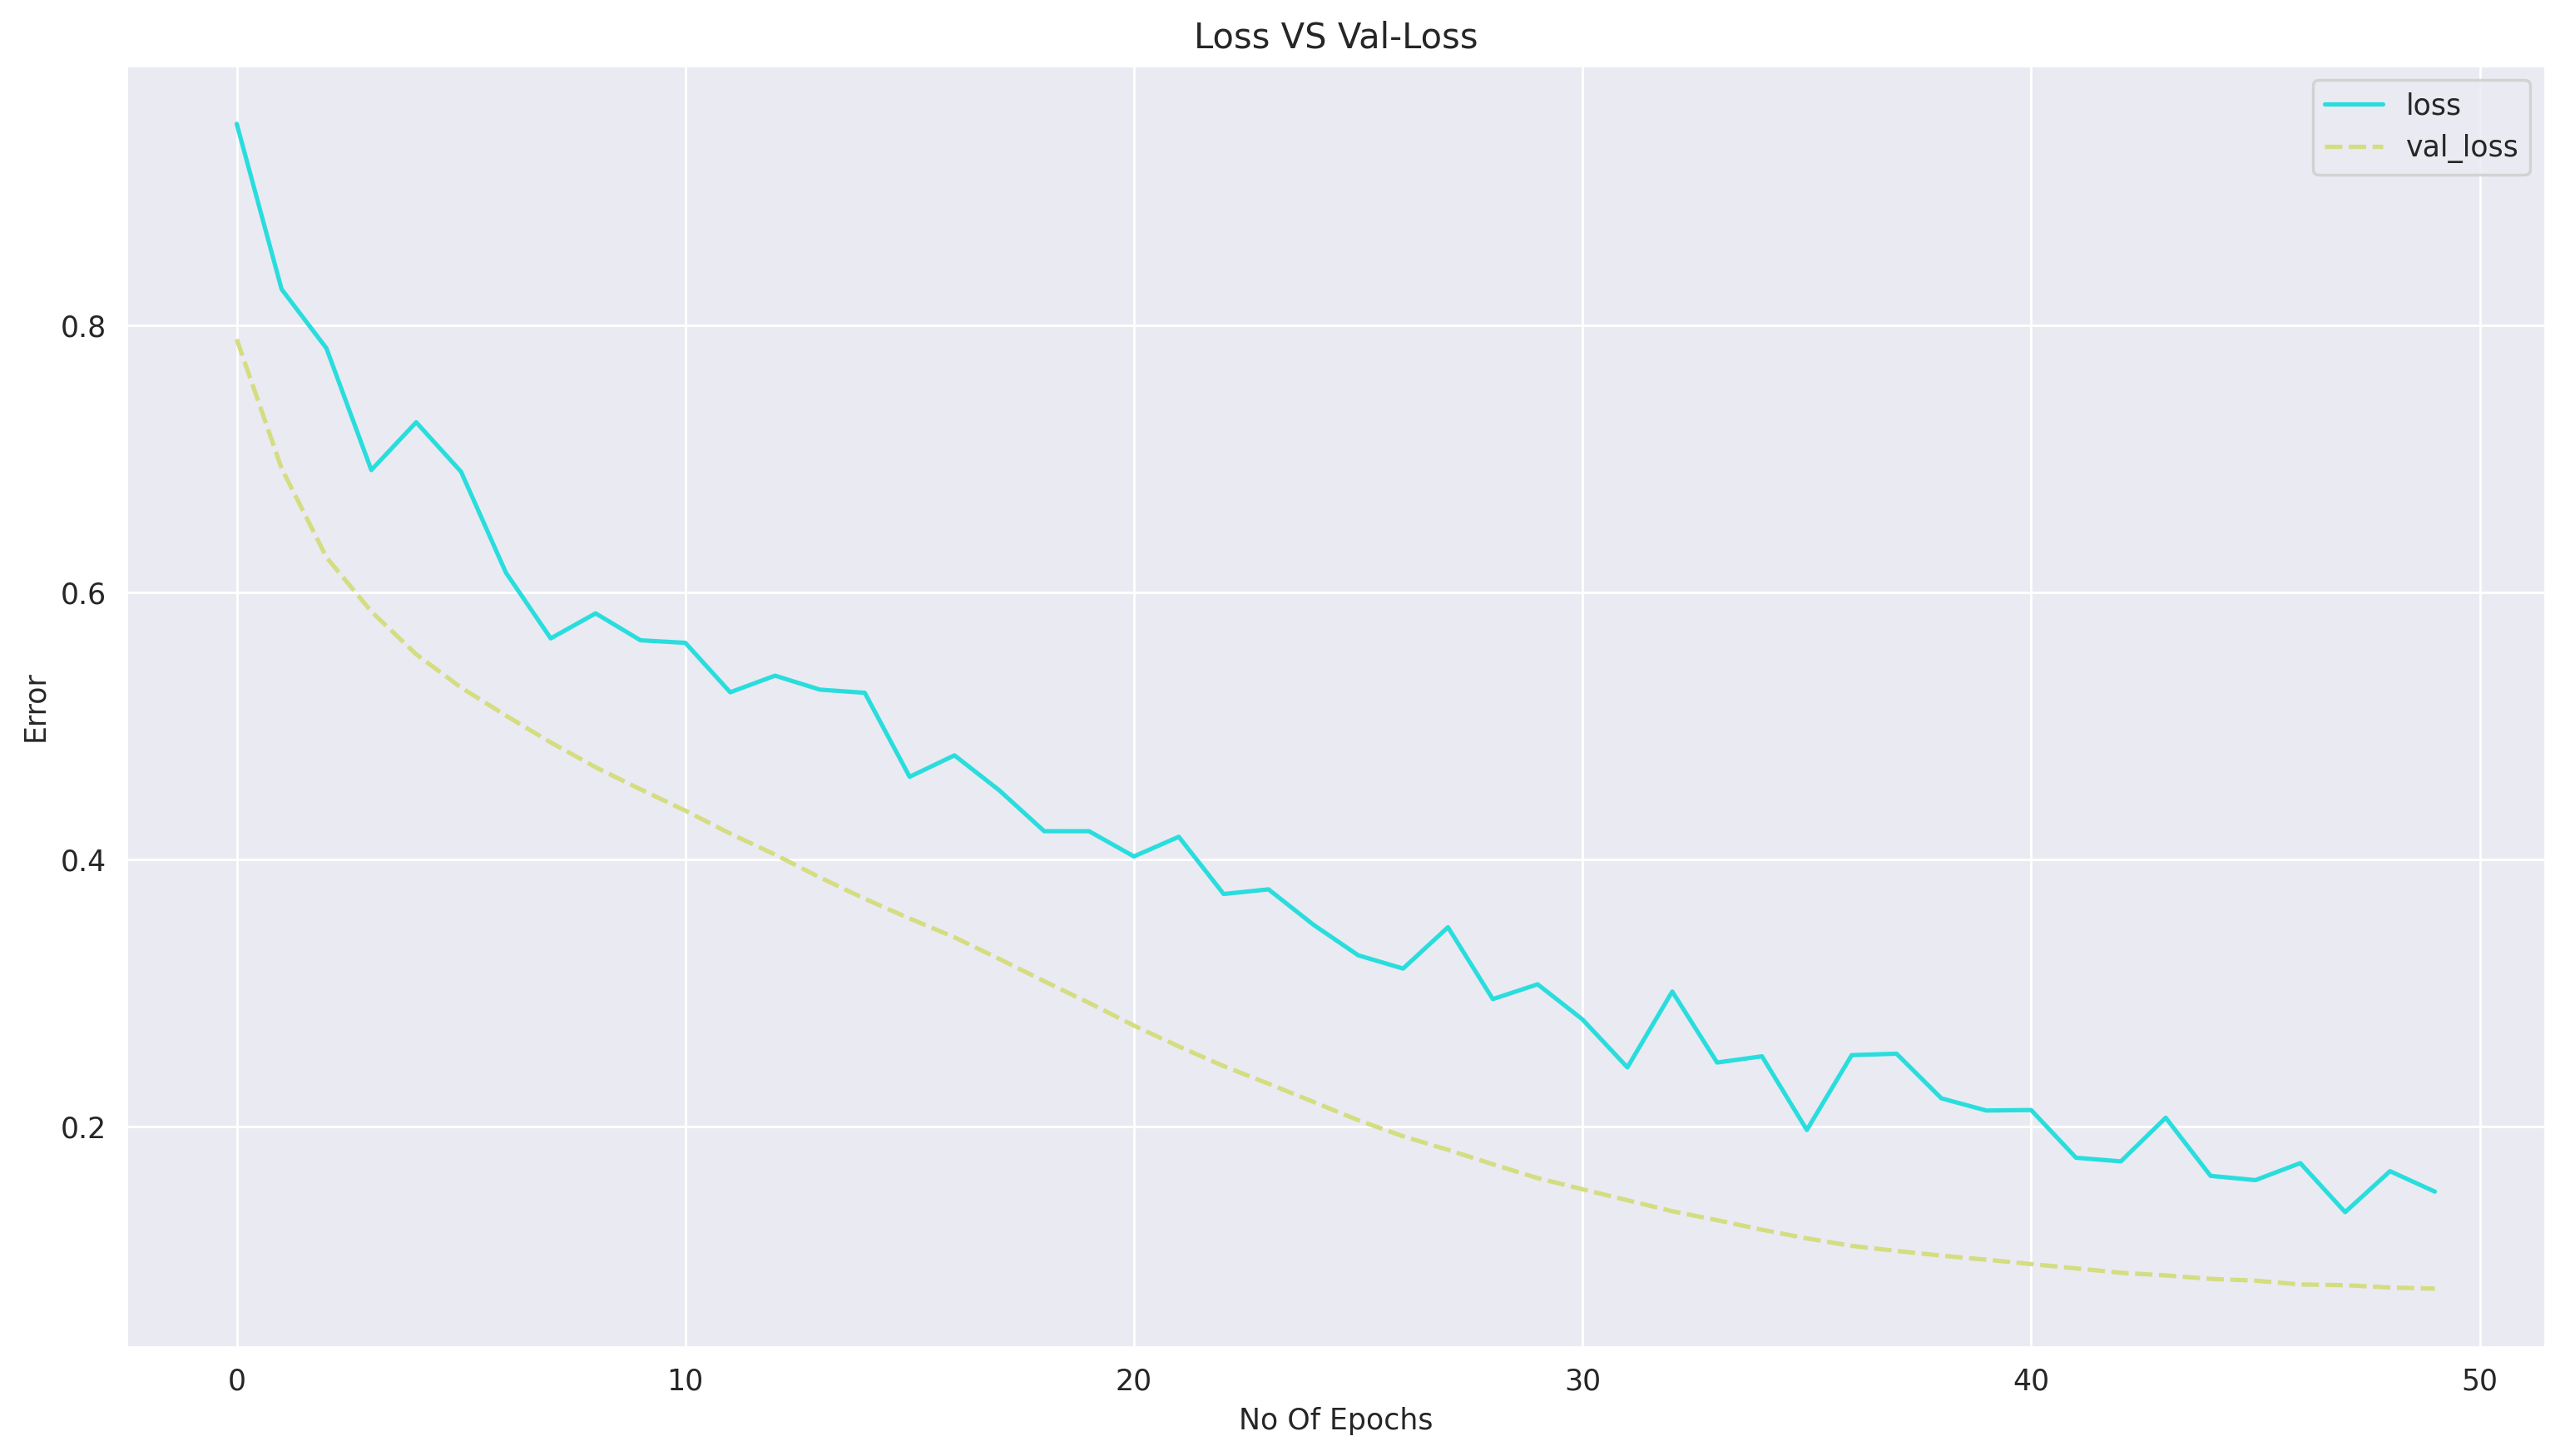

In [76]:
val_loss_dol = pd.DataFrame(ann_dol.history.history)

sns.lineplot(data = val_loss_dol, palette='rainbow')
plt.title('Loss VS Val-Loss')
plt.ylabel('Error')
plt.xlabel('No Of Epochs')

##### Creating Classification Report

In [77]:
ypred_dol = ann_dol.predict(xtest)
ypred_dol = ypred_dol > 0.5

4/4 [==============================] - 0s 2ms/step


In [78]:
print(classification_report(ytest,ypred_dol))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        23
           1       0.98      0.98      0.98        91

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



### Creating Model With Early Stopping And Drop Out Layer

#### Creating ann Model

In [79]:
early = EarlyStopping(monitor='val_loss',mode='min', patience=25)

In [80]:
ann_all =Sequential()

##### Creating Hidden Layer

In [81]:
ann_all.add(Dense(units=30, activation='relu'))
ann_all.add(Dropout(rate=0.5))

ann_all.add(Dense(units=20, activation='relu'))
ann_all.add(Dropout(rate=0.5))

##### Creating Output Layer

In [82]:
ann_all.add(Dense(units=1, activation='sigmoid'))

##### Connecting All Neurons In Each Layer

In [83]:
ann_all.compile(optimizer='adam', loss='binary_crossentropy')

##### Fitting Data

In [84]:
ann_all.fit(xtrain, ytrain, validation_data = (xtest, ytest), callbacks=[early] , epochs = 100)

Epoch 1/100
11/11 [==============================] - 1s 20ms/step - loss: 0.6697 - val_loss: 0.5852
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 0.6513 - val_loss: 0.5651
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 0.6656 - val_loss: 0.5520
Epoch 4/100
11/11 [==============================] - 0s 8ms/step - loss: 0.6141 - val_loss: 0.5351
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 0.6255 - val_loss: 0.5188
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 0.6076 - val_loss: 0.5054
Epoch 7/100
11/11 [==============================] - 0s 7ms/step - loss: 0.5839 - val_loss: 0.4901
Epoch 8/100
11/11 [==============================] - 0s 5ms/step - loss: 0.5716 - val_loss: 0.4775
Epoch 9/100
11/11 [==============================] - 0s 5ms/step - loss: 0.5331 - val_loss: 0.4644
Epoch 10/100
11/11 [==============================] - 0s 6ms/step - loss: 0.5165 - val_loss: 0.4496
Epoch 11

#### Evaluating The Model

##### Ploting Line-Plot

Text(0.5, 0, 'No Of Epochs')

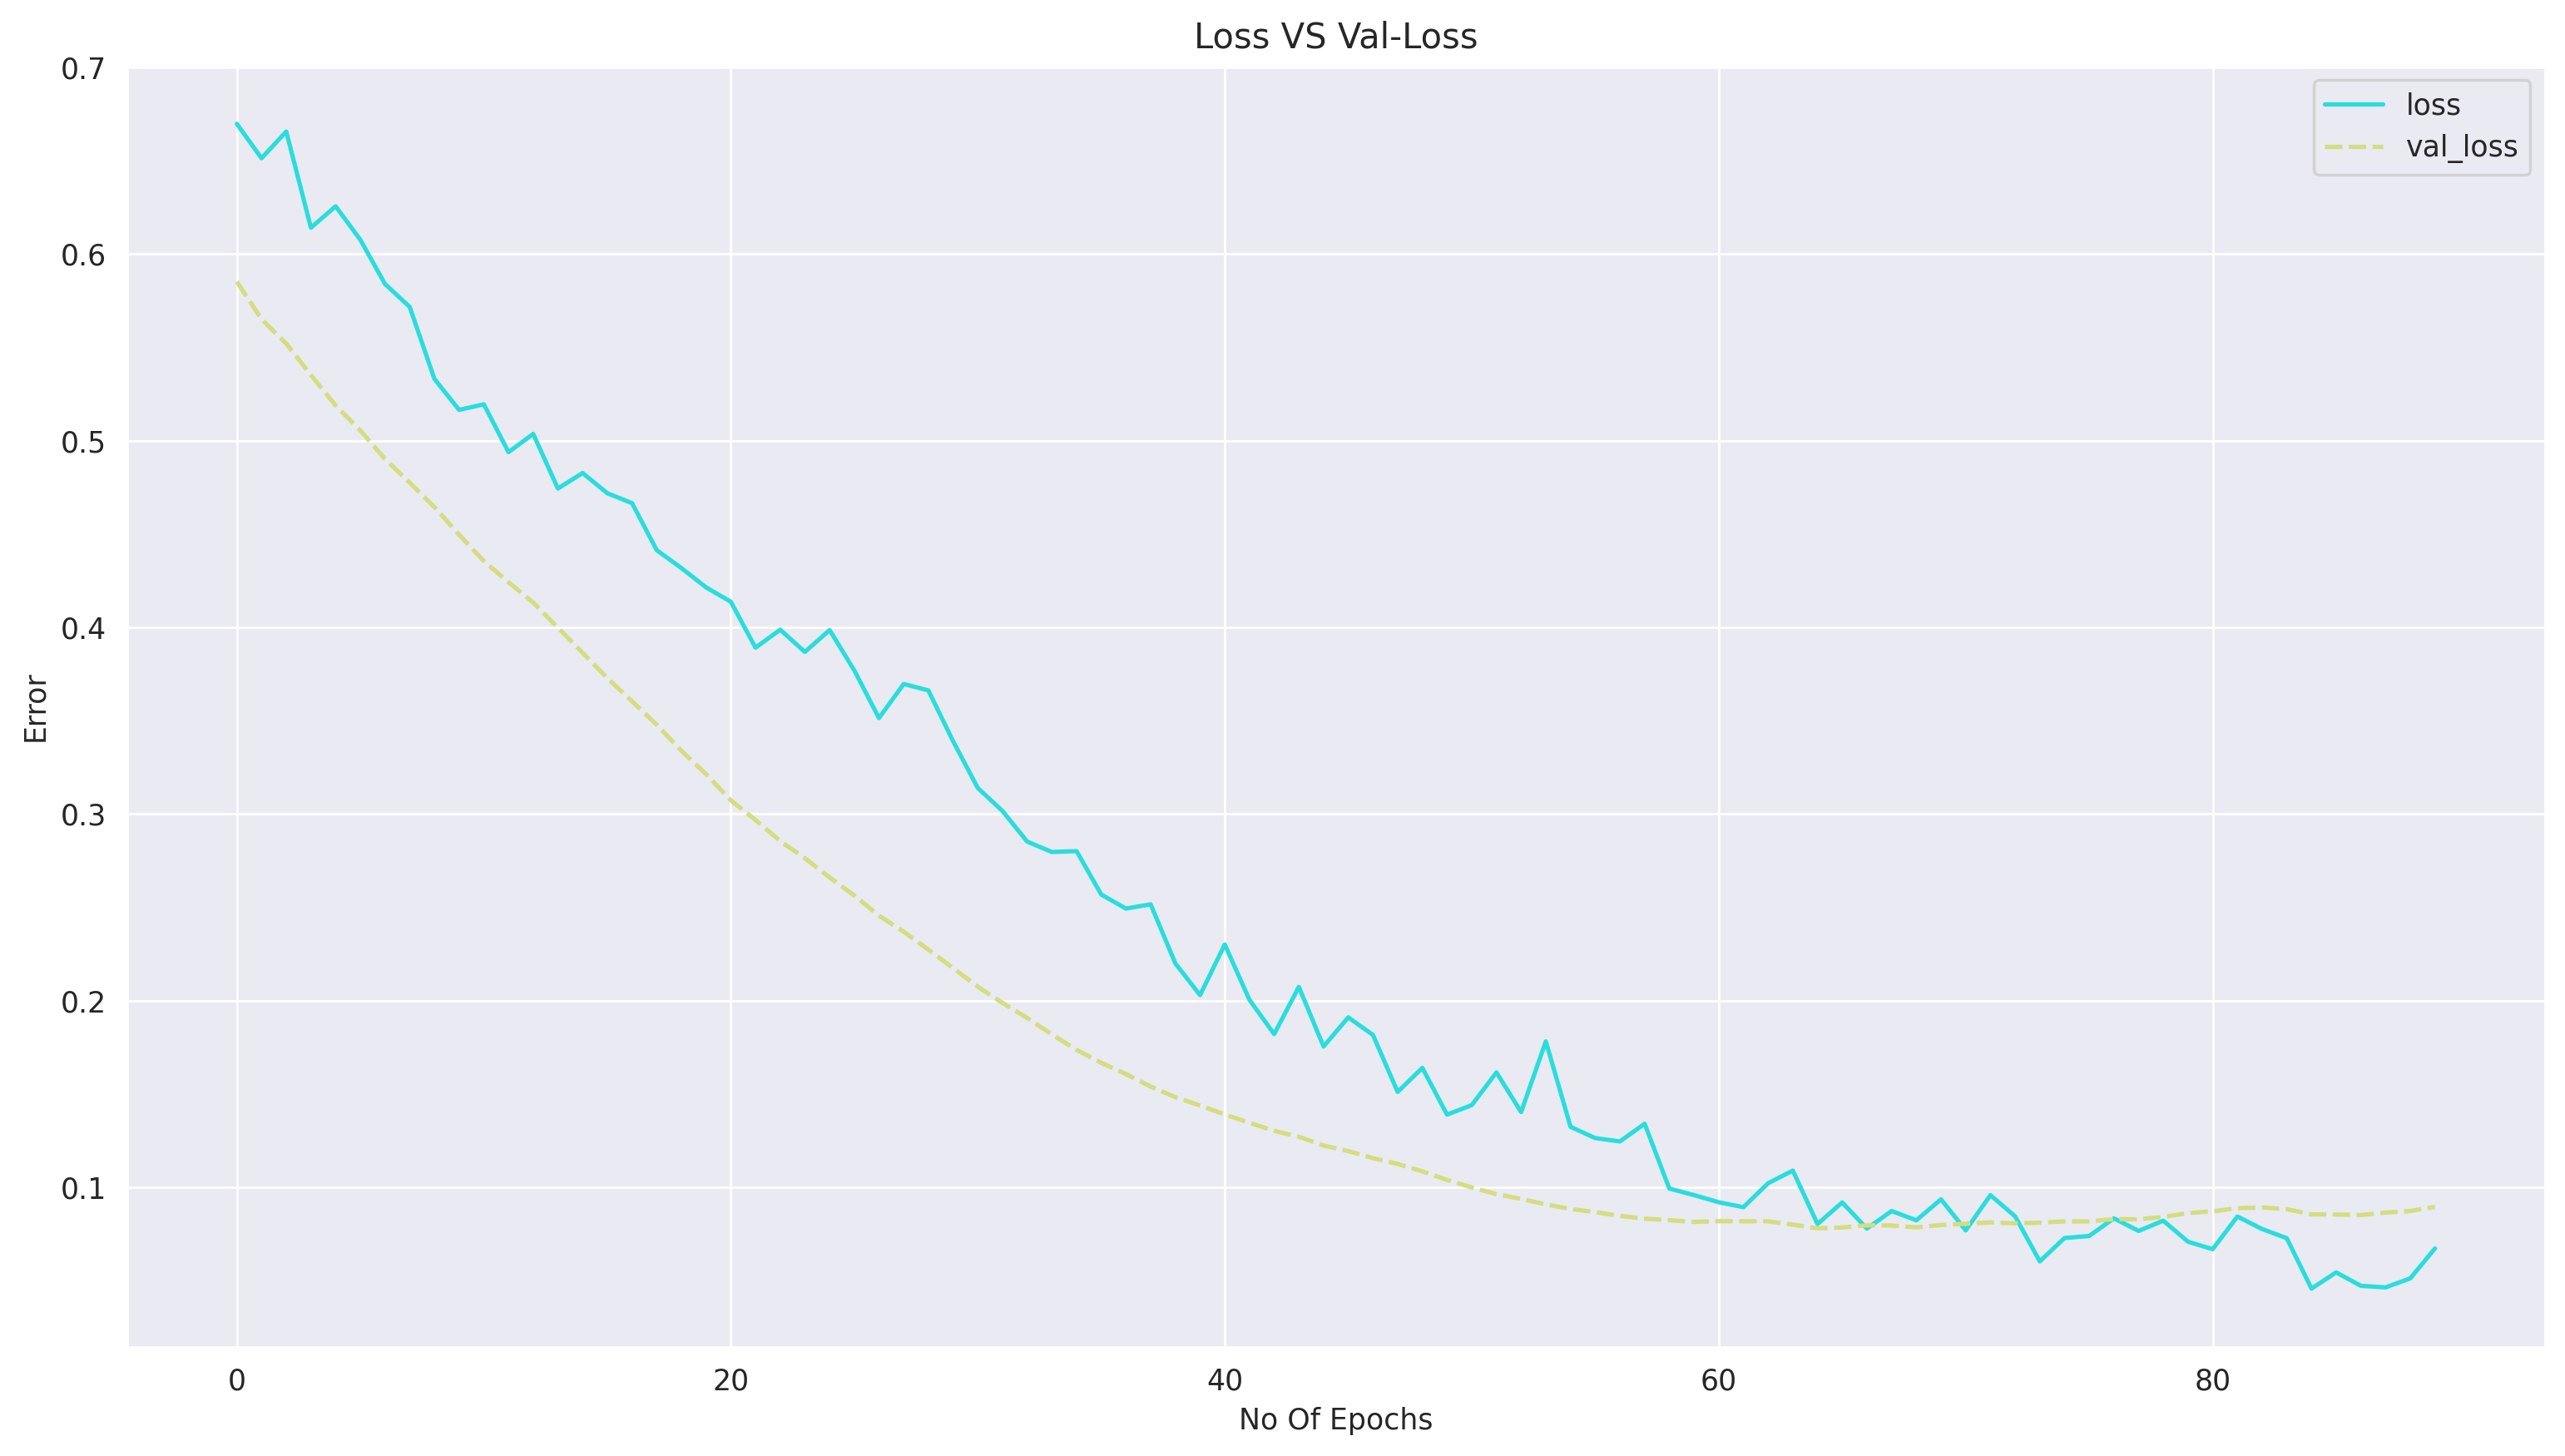

In [85]:
val_loss_all = pd.DataFrame(ann_all.history.history)

sns.lineplot(data = val_loss_all, palette='rainbow')
plt.title('Loss VS Val-Loss')
plt.ylabel('Error')
plt.xlabel('No Of Epochs')

##### Creating Classification Report

In [86]:
ypred_all = ann_all.predict(xtest)
ypred_all = ypred_all > 0.5

4/4 [==============================] - 0s 3ms/step


In [87]:
print(classification_report(ytest,ypred_all))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        23
           1       0.99      0.97      0.98        91

    accuracy                           0.96       114
   macro avg       0.93      0.96      0.95       114
weighted avg       0.97      0.96      0.97       114



### Compairing All Model

<Axes: title={'center': 'Model With Early Stop And Drop Out Layer'}>

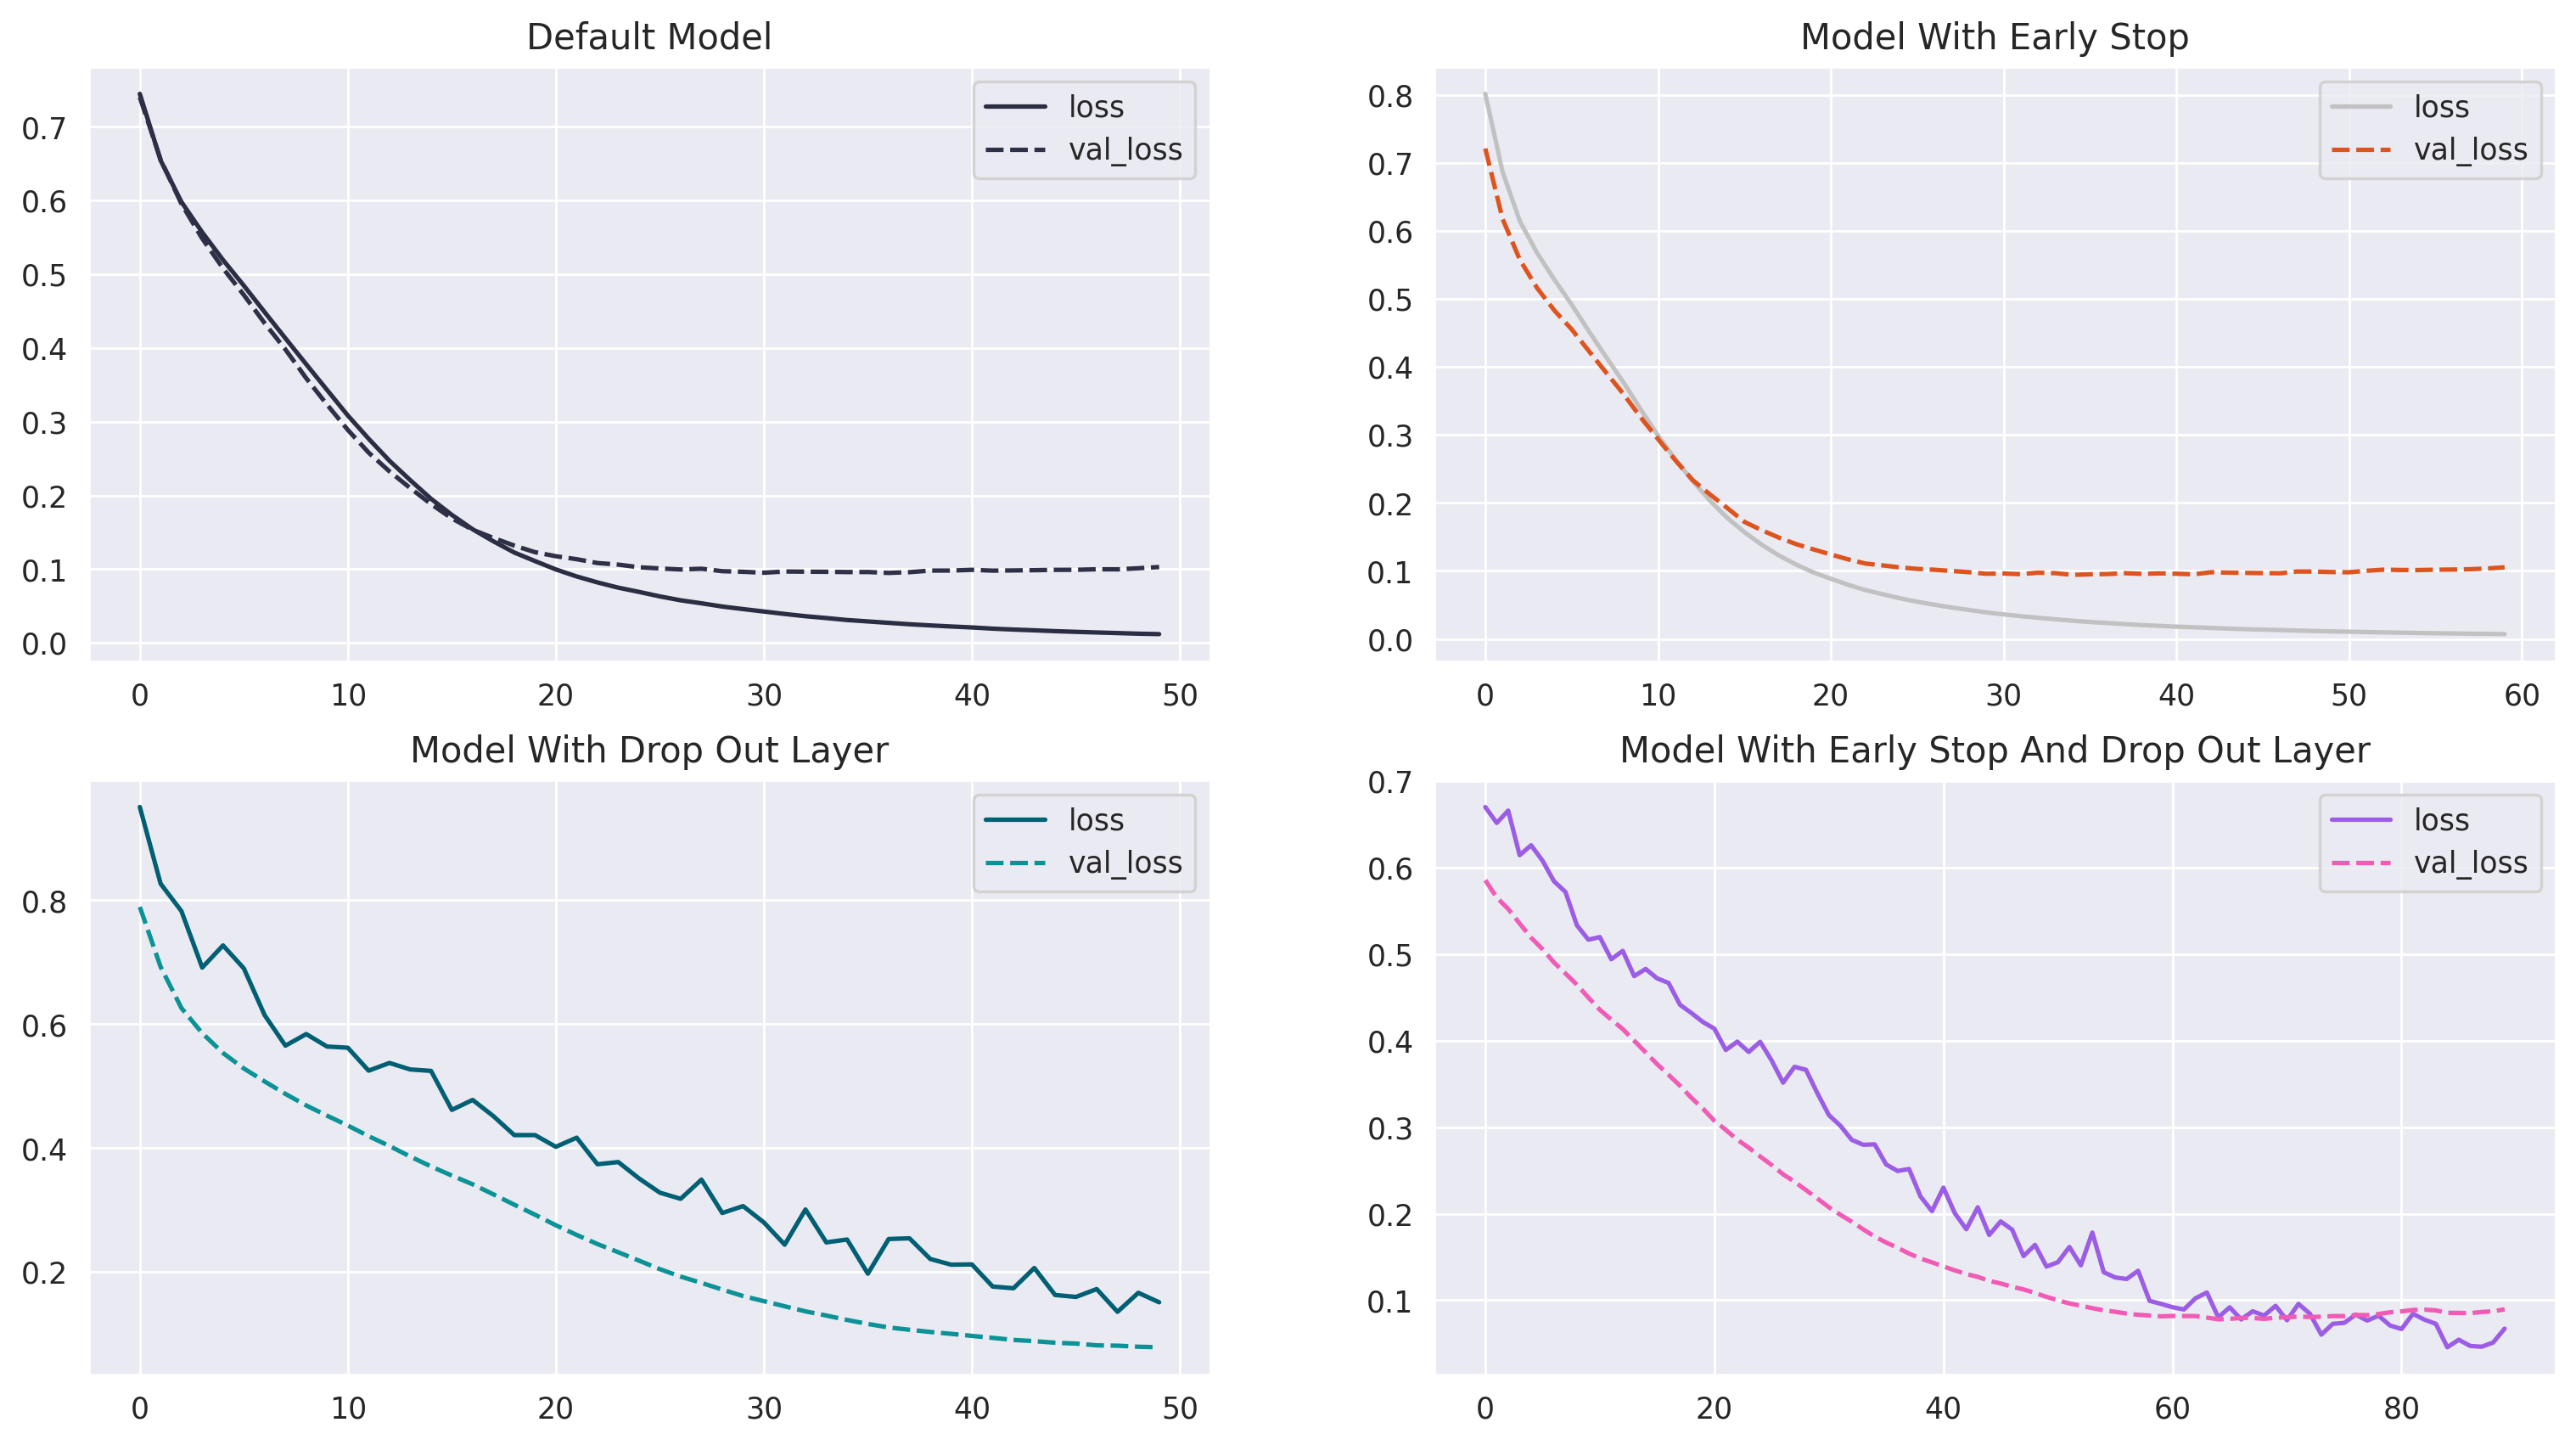

In [88]:
fig, ax = plt.subplots(2, 2)

ax[0, 0].title.set_text('Default Model')
sns.lineplot(data=val_loss_def, ax = ax[0, 0], palette = ['#2b2d42', '#2d3047'])

ax[0, 1].title.set_text('Model With Early Stop')
sns.lineplot(data=val_loss_es, ax = ax[0, 1], palette = ['#c2c1c2', '#de541e'])

ax[1, 0].title.set_text('Model With Drop Out Layer')
sns.lineplot(data=val_loss_dol, ax = ax[1, 0], palette = ['#005f73', '#0a9396'])

ax[1, 1].title.set_text('Model With Early Stop And Drop Out Layer')
sns.lineplot(data=val_loss_all, ax = ax[1, 1], palette = [ '#9b5de5', '#f15bb5'])